#

# ------------------ Machine Learning ------------------

#

The goal of this analysis is to perform EDA, pre-processing including feature selection, engineering and scaling which will lead to the identification of the optimal machine learning model, including logistic regression and random forests modelled on PCA results to predict schizophrenia patient diagnosis.

#

Import relevant libraries

In [99]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan
import seaborn as sns
import statsmodels as sm

# Visualisations libraries
from colorama import Fore, Style
import missingno as msno
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import probplot
from scipy.stats import boxcox

# Machine Learning libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_absolute_error
from sklearn.metrics import precision_score, precision_recall_curve, recall_score, roc_curve, roc_auc_score, silhouette_score
from sklearn.decomposition import PCA



#

Read in the csv file

In [100]:
sz_df = pd.read_csv('MS4H03_Dataset (1).csv')
pd.set_option('display.max_columns', 100) # ensure all columns are visible

#

#

# -------------------------- EDA --------------------------------
# --------------------------- & ----------------------------------
# ------------------ DATA PRE-PROCESSING -------------------

#

#

From exploratory data analysis (EDA), I will gain insights into the schizophrenia data, which will help me make decisions about how to preprocess and transform the data on the training prior to any machine learning (ML). From this, I will utilise the same transformations on the validation set, to evaluate the performance of any ML models and to tune the hyperparameters of ML models. After this is complete, the testing set will be used to evaluate the final performance of the ML model, to give an unbiased approximation of how well the model will perform on new, unseen data.

#

In [101]:
# Look at column names for sz file, try to understand how each column title relates to one another
print(Fore.YELLOW + f"\n\nAll the Columns names are:\n\n", Style.RESET_ALL, f"{sz_df.columns}\n")

# Understand the shape and size of the dataframe
print(Fore.YELLOW + f"\n\nDataframe shape:\n\n", Style.RESET_ALL, f"{sz_df.shape}\n")



All the Columns names are:

  Index(['Diagnosis', 'Anhedonia', 'Apathy', 'Appetite', 'Concentration',
       'Content', 'Delay', 'Delusion', 'Dep_Mood', 'Focus', 'Hallucination',
       'Housing', 'Intrusive_Thoughts', 'Participant', 'Passive', 'Pregnant',
       'Psychomotor', 'Race', 'Rumination', 'Sex', 'Sleep', 'Stress',
       'Suspicious', 'Tension', 'Tired', 'Unusual_Thought', 'Withdrawal'],
      dtype='object')



Dataframe shape:

  (5000, 27)



#

In [102]:
# Preview the first few of rows of the sz dataframe

sz_df.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,Hallucination,Housing,Intrusive_Thoughts,Participant,Passive,Pregnant,Psychomotor,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,12.831823,Stable,6.648416,1,4.385417,0.0,3.854579,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,38.979963,Stable,4.873116,1,2.491285,NaN,5.821110,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,11.296530,Stable,7.924018,1,-999.000000,0.0,7.893102,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,4.237368,Stable,NaN,1,-999.000000,0.0,3.812874,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,0.863636,Stable,5.650523,1,7.999254,NaN,5.119658,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707


#

In [103]:
# Identify datatypes of columns in 'sz_df' so that categorical variables can be identified
print(Fore.YELLOW + f"\nWhat DataType are all the columns?\n", Style.RESET_ALL, F"\n{sz_df.dtypes}\n\n\n")

# Number of different DataTypes within the dataset
print(Fore.YELLOW + f"Number of unique DataTypes:\n", Style.RESET_ALL, F"\n{sz_df.dtypes.nunique()}\n")


What DataType are all the columns?
  
Diagnosis               int64
Anhedonia             float64
Apathy                float64
Appetite              float64
Concentration         float64
Content               float64
Delay                  object
Delusion              float64
Dep_Mood              float64
Focus                 float64
Hallucination         float64
Housing                object
Intrusive_Thoughts    float64
Participant             int64
Passive               float64
Pregnant              float64
Psychomotor           float64
Race                   object
Rumination            float64
Sex                    object
Sleep                 float64
Stress                float64
Suspicious            float64
Tension               float64
Tired                 float64
Unusual_Thought       float64
Withdrawal            float64
dtype: object



Number of unique DataTypes:
  
3



From the brief preview of the dataset above, I have identified these key points:

- The dataframe consists of 5000 rows and 27 columns
- There are 3 unique datatypes within the dataset, which consist of both numerical and categorical data
- Nans are present in 'Intrusive_Thoughts', 'Pregnant' and 'Suspicious'
- 'Passive' column seems to have -999 values which differ to the other 2 points show in the preview

This gives me enough information to act as a starting point, from which I can begin EDA and pre-processing of my data.

#

#

--------------------------------------------------------- Splitting the Data --------------------------------------------------------

#

#

I will be splitting the data into 3 sets: training, validation and testing set. This allows me to evaluate the performance of my machine learning model on data that it has not encountered, which will measure how well the model generalizes to new data. The training set is used to fit the model and tune hyperparameters, while the test set is used to evaluate the performance of the model on unseen data. validation set during model training to tune the model's hyperparameters. The validation set is a portion of the training set that is held out from the actual training process and is used to evaluate the model's performance during training. The hyperparameters are adjusted based on the validation set's performance until the optimal hyperparameters are found.

It is important to split the data before building a model because if the same data is used for both training and testing, the model may overfit the data and perform poorly on new, unseen data. By splitting the data, we can evaluate the model's ability to generalize to new data and make informed decisions about which model to use or how to adjust the model to improve its performance.

#

In [104]:
""" 
From previewing the data, I have established that the output target variable will be 'Diagnosis', with the input features 
the remainding 26 columns. The train/test split will be divided into 80/20 proportions, randomly stated. The Training set
will be further split into a validation set, which will be used to tune hyperparameters and evaluate the performance of
the model during training. I will then check the size of the train, validation and test sets are the correct proportions, 
with the train set being the largest, followed by test and validation.
"""

# Split the data into a training set and a testing set. X is the input features, y is the target variable (DIagnosis)
X_train, X_test, y_train, y_test = train_test_split(
    sz_df.drop('Diagnosis', axis=1), 
    sz_df['Diagnosis'],
    test_size=0.2, 
    random_state=10)

X_train.shape, X_test.shape

((4000, 26), (1000, 26))

#

I decided not to create a validation set amongst these steps, as I will be using a cross validation technique during the ML section. The reason for this is the validation set subsets a portion of the data aside, as this is allocated randomly, the data may not be representative of the entire dataset, creating a risk of over/underfitting. Whereas cross validation is a robust technique that uses all available data, making the data usage more efficent (Wani et al., 2018). Further, it optimises the model by identifying the best hyperparameters, allowing ML model evaluation on subsets of data.

I will now check whether there are significant differences in the behaviours of variables between the train, validation and test sets. To compare distributions and characteristics of variables, I will utilise a correlation matrix as a visualisation technique, rather than looking at all columns individually via histograms. If they are similar, then the variables are likely to behave similarly in both sets, making the test set representative of the training set population. However, if the test and training sets are not similar, then overfitting or underfitting may be a problem as the ML models performance on the test data may not accurately reflect its performance on unseen data, resuling in poor generalization.

#

In [105]:
# Concatenate the training and test dataframes
df_concat = pd.concat([X_train.describe(), X_test.describe()], axis=1)

# Rename the columns to indicate the train, validation and test sets
df_concat.columns = ['Train_' + col for col in X_train.describe().columns] + \
                    ['Test_' + col for col in X_test.describe().columns]

# Print the new DF so a comparison is available
df_concat

,Train_Anhedonia,Train_Apathy,Train_Appetite,Train_Concentration,Train_Content,Train_Delusion,Train_Dep_Mood,Train_Focus,Train_Hallucination,Train_Intrusive_Thoughts,Train_Participant,Train_Passive,Train_Pregnant,Train_Psychomotor,Train_Rumination,Train_Sleep,Train_Stress,Train_Suspicious,Train_Tension,Train_Tired,Train_Unusual_Thought,Train_Withdrawal,Test_Anhedonia,Test_Apathy,Test_Appetite,Test_Concentration,Test_Content,Test_Delusion,Test_Dep_Mood,Test_Focus,Test_Hallucination,Test_Intrusive_Thoughts,Test_Participant,Test_Passive,Test_Pregnant,Test_Psychomotor,Test_Rumination,Test_Sleep,Test_Stress,Test_Suspicious,Test_Tension,Test_Tired,Test_Unusual_Thought,Test_Withdrawal
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3333.000000,4000.0,4000.000000,2206.000000,4000.000000,4000.000000,4000.000000,4000.000000,1678.000000,4000.000000,4000.000000,4000.000000,4000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,837.000000,1000.0,1000.000000,556.000000,1000.000000,1000.000000,1000.000000,1000.000000,449.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.501696,2.481074,27.091340,6.518248,0.275893,2.651106,5.749947,6.518248,64.481154,5.707664,1.0,-424.539428,0.105168,4.671383,5.693818,7.009058,4.931466,2.726915,4.924306,inf,2.477018,3.954918,6.507516,2.469946,26.984785,6.526627,0.293463,2.582520,5.635521,6.526627,67.444543,5.681230,1.0,-410.673541,0.086331,4.717386,5.653808,7.020096,4.856225,2.859529,4.906111,inf,2.493258,3.970931
std,1.494361,1.719664,14.178384,1.472525,0.829541,1.437774,3.278957,1.472525,226.352286,2.372493,0.0,496.726863,0.306839,1.486765,2.151824,1.407617,2.230731,1.468704,1.982371,NaN,1.403716,1.471760,1.463777,1.775541,14.305956,1.484815,0.854297,1.450019,3.306648,1.484815,214.130493,2.385870,0.0,494.752421,0.281105,1.466447,2.202501,1.424342,2.177941,1.591796,1.880987,NaN,1.437834,1.460807
min,1.098854,-3.211011,0.141074,1.578187,0.000210,-2.127037,0.000000,1.578187,0.055778,-0.891284,1.0,-999.000000,0.000000,0.123560,-0.409032,2.144726,-3.257788,-1.682951,-1.527706,0.687499,-1.981307,-0.825919,1.839206,-2.611561,1.598755,1.299964,0.000187,-1.528223,0.000000,1.299964,0.027350,-1.386416,1.0,-999.000000,0.000000,-0.024974,0.267931,2.705659,-2.095097,-2.346238,-2.183456,0.366650,-1.367384,-0.328247
25%,5.505721,1.283286,16.831702,5.526042,0.018876,1.649110,4.741513,5.526042,4.167351,3.992063,1.0,-999.000000,0.000000,3.656160,4.053995,6.062140,3.431469,1.691701,3.538017,4.527153,1.482759,2.969534,5.475317,1.211119,16.277297,5.564861,0.017532,1.560030,4.376010,5.564861,3.997020,3.910964,1.0,-999.000000,0.000000,3.844705,3.976949,6.047555,3.467068,1.775064,3.708135,4.375286,1.503389,2.975720
50%,6.485527,2.425930,25.224676,6.490890,0.066163,2.567608,6.751337,6.490890,12.882734,5.570000,1.0,3.205501,0.000000,4.708633,5.514379,6.978909,5.124291,2.707226,5.244158,5.522291,2.389102,3.958597,6.480674,2.440554,25.021339,6.520114,0.058619,2.535402,6.759666,6.520114,12.607902,5.599997,1.0,3.572823,0.000000,4.783529,5.543576,7.002779,5.010509,2.791563,5.266046,5.459738,2.388121,3.987547
75%,7.476031,3.634539,35.345472,7.511136,0.219637,3.603860,8.047392,7.511136,43.002649,7.396088,1.0,5.086489,0.000000,5.683932,7.279108,7.961775,6.561111,3.672909,6.424016,6.576730,3.414915,4.981585,7.542119,3.662983,35.720466,7.531379,0.200537,3.532979,8.024958,7.531379,39.082761,7.283038,1.0,5.163300,0.000000,5.677823,7.252209,8.052425,6.422669,3.947442,6.205846,6.509869,3.468667,4.932597
max,11.603140,8.803433,113.438734,11.649649,21.001327,8.978785,12.003550,11.649649,6287.163151,12.463696,1.0,9.799751,1.000000,10.171540,12.009666,11.920312,11.970952,8.212275,9.622076,inf,8.066822,8.725860,10.741031,7.886749,86.852307,10.609198,11.311678,7.545008,11.707341,10.609198,3653.678622,13.209009,1.0,8.822680,1.000000,9.696252,11.851622,11.027372,10.134208,7.294877,8.921625,inf,6.816137,9.022207


#

The training and test data seem to be following similar patterns of behaviours, including:

- the presence of null values in the same columns between data sets
- large standard deviation for some columns including 'Hallucination' and 'Appetite'
- low variation in data for 'Participant'

To gain further visual insights on the similarities and differences between the data, I will be comparing the columns correlation between sets through correlation matrix.

#

C:\Users\wstefaniak\AppData\Local\Temp\ipykernel_848\1417733276.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


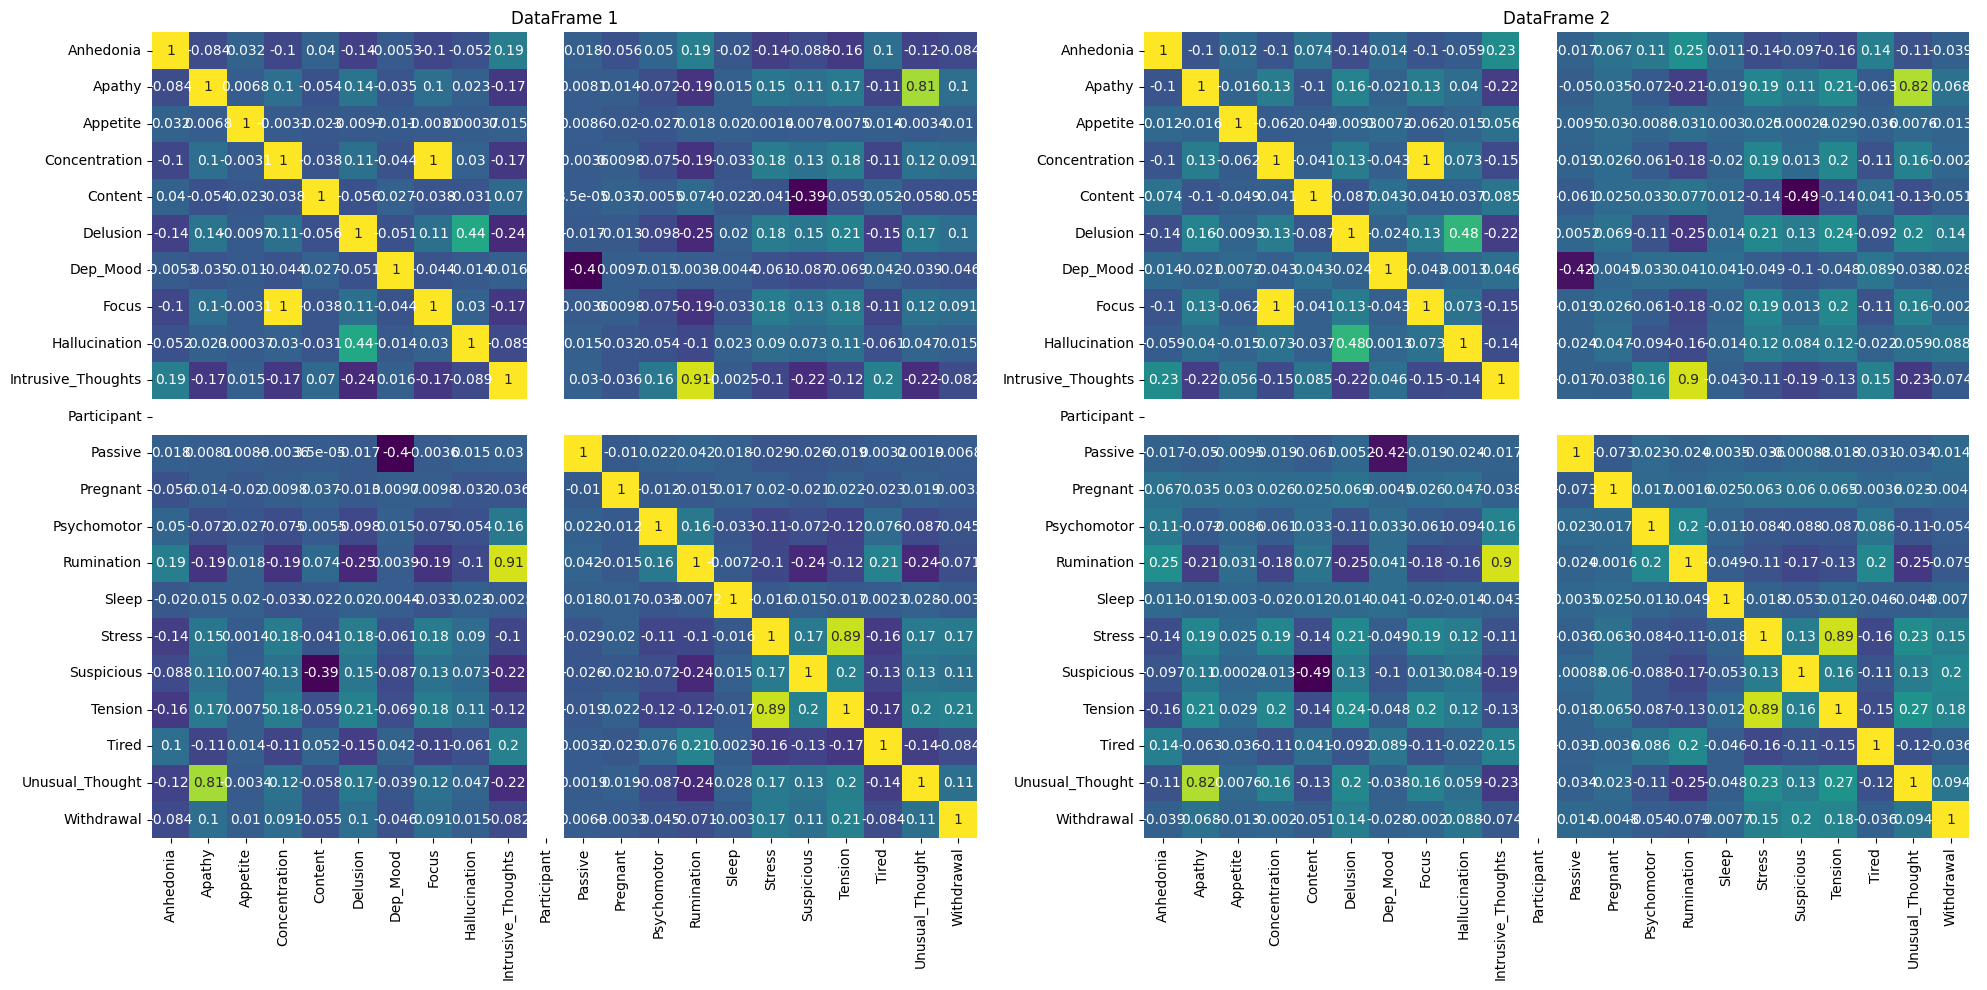

In [106]:
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot each correlation matrix on a separate subplot
for i, df in enumerate([X_train, X_test]):
    corr = df.corr()
    sns.heatmap(corr, cbar=False, annot=True, cmap="viridis", ax=axs[i])
    axs[i].set_title(f"DataFrame {i+1}")

plt.tight_layout()
plt.show()

#

C:\Users\wstefaniak\AppData\Local\Temp\ipykernel_848\295254138.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


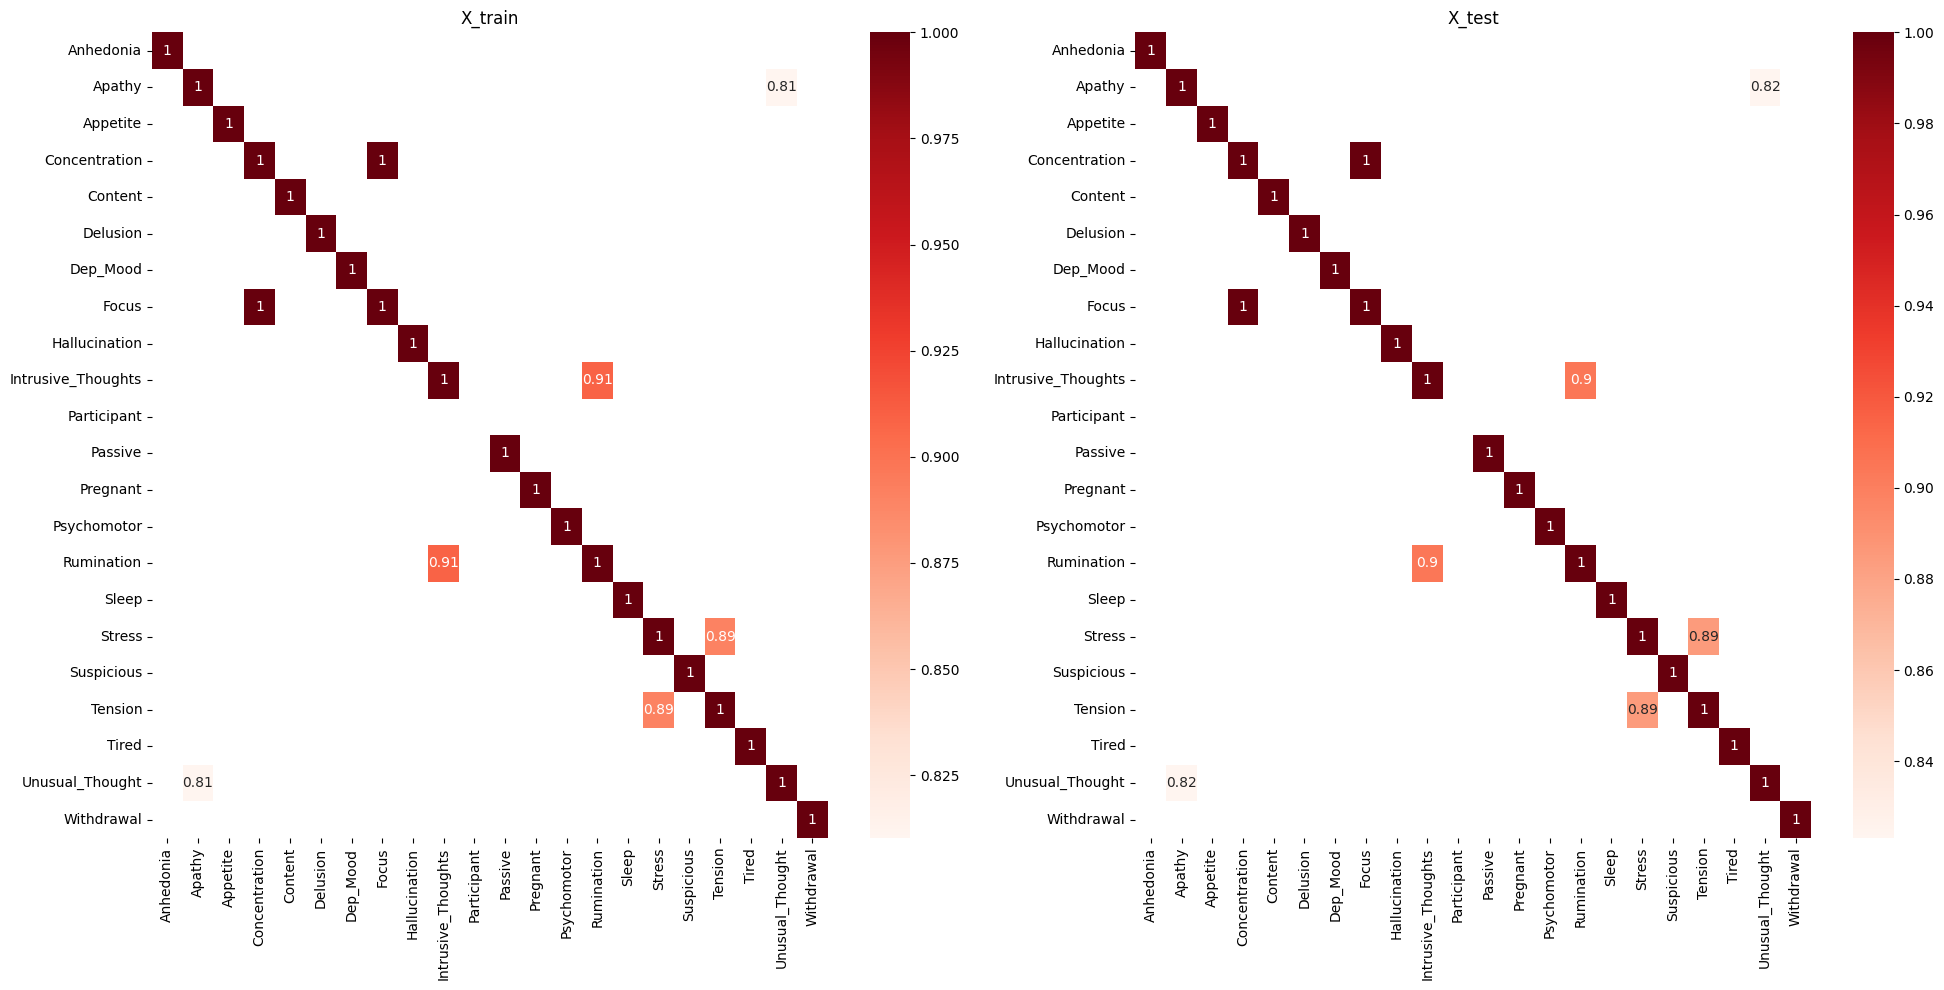

In [107]:
""" 
From the above heatmap I can tell that the test and train data sets have similar correlations, however I would like a
more in depth insight into which highly correlated values are shared. This will indicate whether dropping to prevent 
multicollinearity in the train set is also suitable for the test set.
"""

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot each correlation matrix on a separate subplot
for i, df in enumerate([X_train, X_test]):
    corr = df.corr()
    filtered_corr = corr[((corr >= .5) | (corr <= -.5))]
    sns.heatmap(filtered_corr, annot=True, cmap="Reds", ax=axs[i])
    
    # Set title of column
    if i == 0:
        axs[i].set_title("X_train")
    else:
        axs[i].set_title("X_test")

plt.tight_layout()
plt.show()


#

The correlation matrix shows that whilst there are slight changes in the correlation between variables (for example, 0.81 between the columns 'Apathy' and 'Unusual_Thought' in the training set, whilst its 0.83 in the test set), it won't have a major impact on the behaviours of the variables in the ML models. 
    This validates that the sets can be used.

#

---------------------------------------------------------------------------------------------------------------------------

#

                                        DEALING WITH CATEGORICAL VALUES

# 

From the preview of the sz_df, I have identified that there are categorical columns within the dataframe. Thus, my first step is to encode categorical features to numerical values so that I can easily visualize and analyze the relationship between the features. This will also ease any data processing techniques such as handling missing values, which will enable data-driven decision to help develop the ML model.

#

In [108]:
# select columns with object data type to idenitfy categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# print the list of categorical columns
print(categorical_cols)

# Identify the number of unique numerical values within each categorical column
X_train[['Delay', 'Housing', 'Race', 'Sex']].nunique()

Index(['Delay', 'Housing', 'Race', 'Sex'], dtype='object')


Delay      2
Housing    2
Race       4
Sex        2
dtype: int64

#

The identified categorical columns 'Delay', 'Housing', 'Race' and 'Sex', don't have an intrinsic order or hierachy within the data, I will use one-hot encoding (get_dummies) (ref) to create new binary columns for each unique category. Further, I identified the volume of unique values in the columns, to see which cateogrical features have 2 or more categories, so that I can use drop_first=True from the get_dummies() function. This will drop one level of the categories and creates a new binary variable for each category, expect for one which as a baseline (when all dummy columns have 0 values). This avoids the 'dummy variable trap' where two or more dummy variables have multicollinearity, by reducing dimensionality and improving the performance of the ML model that is based on numerical data.

#

In [109]:
# Change categorical data into indicator values
# Reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

# Create a function to make dummies
def create_dummy_variables(df):
    # Apply get_dummies function on the 3 columns columns
    race_dummy = pd.get_dummies(df, columns=['Race','Delay', 'Housing'], drop_first=True)
    
    # Apply get_dummies function on 'Sex' column
    sz_df_dummy = pd.concat([race_dummy, pd.get_dummies(df['Sex'])], axis=1)

    # Drop the original columns that weren't removed after the concat of the 2 dummy dataframes
    df_dummy = sz_df_dummy.drop(['Sex'], axis=1)
    
    return df_dummy 

df_dummy = create_dummy_variables(X_train)

#

The new categorical columns have been created. For the columns with the prefix 'Race' if a 0 is present in all 3 of the columns, then it indicates that the race is Asian. For the Delay_Yes column a 1 indicated that there is delay in the particpant, whereas a 0 indicates no delay. This applies to the column Housing_unstable.

#

---------------------------------------------------------------------------------------------------------------------------

#

                                            Missing Values

#

It is importnant to identify whether there are any null values in the dataset. Before identifying the best method for handling missing values, I need to establish the type of missing value and the significance is has on the dataset. If values are missing completely at random, the data sample is likely still representative of the population. However, if the values are missing systematically, analysis may be biased. It is important to handle the missing values correctly, as they can bias the results of ML models, resulting in decreased accuracy.

#


Columns in the df with null values:
  
Suspicious            2322
Pregnant              1794
Intrusive_Thoughts     667
dtype: int64


Percentage of missing values:
  
Suspicious            58.05
Pregnant              44.85
Intrusive_Thoughts    16.68
dtype: float64

Columns in 'Messages' missing >20% entries:
  
Index(['Suspicious'], dtype='object')



<AxesSubplot: >

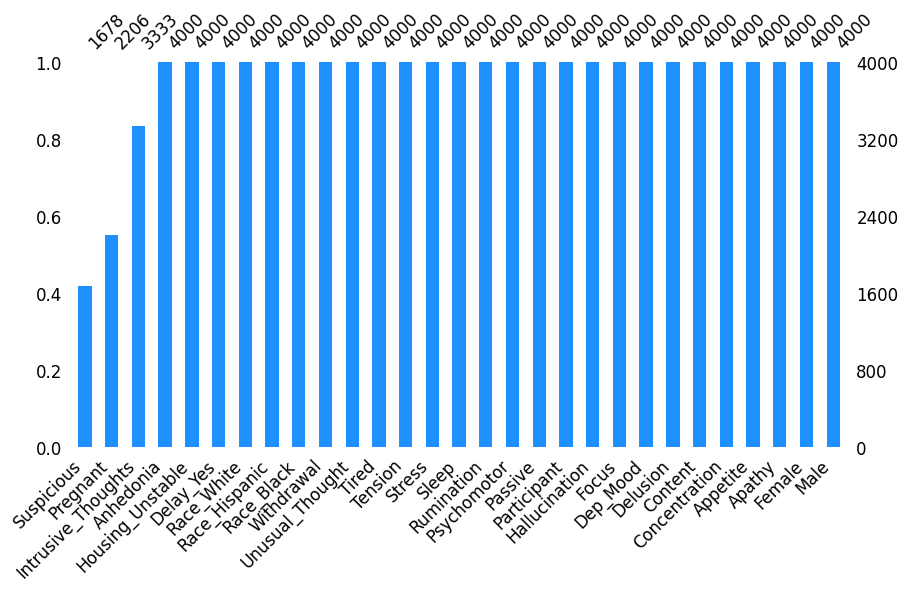

In [110]:
""" 
Identifying the percentage of missing values in columns in each file, in ascending order, and identifying the top columns
that are missing over 20% of the data. Whilst the numerics give great insight into the issues, a graph helps visualise the
impact each of the missing columns has.
"""

# Top 3 missing value columns in descending order in sz_df
print(Fore.YELLOW + f"\nColumns in the df with null values:\n", Style.RESET_ALL, 
      f"\n{df_dummy.isnull().sum().sort_values(ascending=False).nlargest(n=3)}\n")

# Identify the top 3 missing value columns as a percentage of missing values
print(Fore.YELLOW + f"\nPercentage of missing values:\n", Style.RESET_ALL, 
      f"\n{round((df_dummy.isnull().sum() * 100/ len(df_dummy)),2).sort_values(ascending=False).nlargest(n=3)}\n")

# Identify columns in 'messages that dont have entries for 20%+ 
print(Fore.YELLOW + f"Columns in 'Messages' missing >20% entries:\n",Style.RESET_ALL, 
      f"\n{df_dummy.columns[df_dummy.isnull().mean() > 0.5]}\n")

# Plot the missing values
# reference https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
msno.bar(df_dummy, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

#

The approximate 60% of missing values in the 'suspicious' column may have a major impact on the dataset and the machine model itself, thus it is important to deal with the column in a suitable way.'Pregnant' and 'Intrusive_Thought' columns have less than 50% of the data missing, thus they could be dealt with differently to the 'suspicious' column. 

As I still don't know whether the 'suspiscious', 'Pregnant' or 'Intrusive_Thought' columns hold any valuable information, I have decided to not drop them *yet* and further analyse the columns, by looking whether they are related to any other columns and what the source of the missing values is. First, I will analyse the 'Pregnant' column to see whether it has any potential links to the sex of the participant.

#

#

In [111]:
# Print the 3 columns which could potentially be related
df_dummy[['Pregnant', 'Female', 'Male']]

,Pregnant,Female,Male
2733,NaN,0,1
447,0.0,1,0
970,NaN,0,1
125,0.0,1,0
798,NaN,0,1
...,...,...,...
1180,0.0,1,0
3441,1.0,1,0
1344,NaN,0,1
4623,0.0,1,0


#

In [112]:
""" 
As observed in the above table, there seems to be a link between the NaN in 'Pregnant' column and whether the participant is
a male (1 in 'Male' column). I will further explore this by looking at whether these 2 columns share any other similarities.
"""

# Identify the values of of 'Sex' column when there are null values in 'pregnant' column
print(Fore.YELLOW + f"\nThe values of 'sex' column for the nulls in 'pregnant' column:\n",Style.RESET_ALL, 
      f"\n{X_train.loc[X_train['Pregnant'].isnull(), 'Sex'].values}\n")

# Identify the number of 'male' values when there is a null in 'pregnant'
print(Fore.YELLOW + f"Number of 'males' when there are nulls in 'pregnant'\n",Style.RESET_ALL, 
      f"\n{len(X_train.loc[X_train['Pregnant'].isnull(), 'Sex'].values)}\n")

print(Fore.YELLOW + f"Total number of nulls in pregnant \n",Style.RESET_ALL, 
      f"\n{X_train['Pregnant'].isnull().sum()}\n")


The values of 'sex' column for the nulls in 'pregnant' column:
  
['Male' 'Male' 'Male' ... 'Male' 'Male' 'Male']

Number of 'males' when there are nulls in 'pregnant'
  
1794

Total number of nulls in pregnant 
  
1794



#

The total of null values in 'Pregnant' column (1447) directly correlates with the total of male values in the 'Sex' column. Therefore, I will be utilising the get_dummies function again. which will enable me to further analyse the relationships between pregnant categorical variables and the 'sex' dummy variables.

#

In [113]:
# create dummy variables for 'Pregnant' column
dummies = pd.get_dummies(df_dummy['Pregnant'],prefix='pregnant', dummy_na=True)

# add the dummy variables to the dataframe
df = pd.concat([df_dummy, dummies], axis=1)

#

In [114]:
"""
To ensure that the pregnant null values equate to males, I will calculate the correlation between the two variables. As the
correlation between them is 1, it shows that when there are null values in the pregnant column (the dummy variable 
pregnant_nan) that means that the participant must be male, as they are unable to conceive. Therefore, through feature
engineering, I will drop the 'Pregnant', 'Female' and 'Male' columns, and combine the 'pregnant_nan' column with 'Male' as
they both hold the same valuable information.
"""

# calculate the correlation between males and null values in 'Pregnant'
print(Fore.YELLOW + f"\nCorrelation between males and null values in 'pregnant' \n",Style.RESET_ALL, 
      f"\n{df['Male'].corr(df['pregnant_nan'])}\n")

# Create a function to drop and rename the 'Pregnant', 'Female', 'Male' columns
def drop_and_rename_columns(df, cols_to_drop, new_col):
    """
    Drops and renames the specified columns.

    Parameters:
    df : The pandas dataframe from which to drop and rename columns.
    cols_to_drop : A list of column names to drop.
    new_col_names : A dict for new column names.

    Returns:
        A modified pandas dataframe with dropped and renamed columns.
    """
    # Drop specified columns
    df = df.drop(cols_to_drop, axis=1)

    # Rename columns
    df = df.rename(columns=new_col)

    return df

# Identify the columns to drop
cols_to_drop = ['Pregnant', 'Female', 'Male']

# New column names
new_col = {'pregnant_0.0': 'Female_N_Preg', 'pregnant_1.0': 'Female_Preg', 'pregnant_nan': 'Male'}

# Apply the function
df = drop_and_rename_columns(df, cols_to_drop, new_col)
df


Correlation between males and null values in 'pregnant' 
  
0.9999999999999999



,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Participant,Passive,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal,Race_Black,Race_Hispanic,Race_White,Delay_Yes,Housing_Unstable,Female_N_Preg,Female_Preg,Male
2733,7.511222,3.214647,21.322569,5.120233,0.028234,2.910855,6.025506,5.120233,12.091295,4.230655,1,4.541374,2.003382,2.706820,6.957753,2.829776,3.535951,2.212168,4.611377,3.612508,1.832986,0,0,1,1,0,0,0,1
447,6.591011,-0.049957,8.311399,4.506714,0.298644,1.645901,6.694196,4.506714,3.257318,9.829754,1,-999.000000,4.861694,9.380876,8.148410,1.964813,1.943945,2.100494,4.743555,0.650661,2.090770,0,0,1,0,0,1,0,0
970,5.420291,3.949330,32.788126,4.673517,0.092967,1.831145,7.012240,4.673517,3.896708,3.618187,1,6.159434,5.943135,4.191846,6.850871,-0.382840,1.417750,0.389544,6.199795,3.867467,3.043989,0,0,0,0,0,0,0,1
125,4.957836,4.690158,45.111014,5.996821,0.015960,3.210937,0.000000,5.996821,65.372328,2.141766,1,4.208126,4.617906,3.284898,7.786659,6.785735,NaN,7.345697,3.561292,4.985110,4.436856,0,0,1,1,0,1,0,0
798,4.490208,5.476981,18.301407,7.056478,0.008111,4.062034,7.665999,7.056478,33.116108,0.197967,1,4.036417,4.575869,3.121595,6.902688,7.049740,5.119751,8.587809,5.531263,4.461778,4.245107,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,6.725006,1.918994,8.169467,5.589702,0.760803,1.295013,0.000000,5.589702,9.407243,5.869601,1,3.244326,7.866286,5.743247,7.729517,4.228726,NaN,5.162795,7.295576,2.904723,5.122506,1,0,0,0,0,1,0,0
3441,6.063447,2.847081,19.044074,6.906872,0.126928,4.465211,0.000000,6.906872,47.573668,9.610266,1,2.250201,4.044177,9.714677,9.007035,5.494240,NaN,7.040737,3.095481,2.820028,4.464137,1,0,0,1,0,0,1,0
1344,6.345897,2.040452,18.269760,7.980328,0.081290,3.162586,6.888158,7.980328,41.615916,5.205986,1,6.822599,4.482281,3.986344,6.233932,0.067265,3.589124,1.513339,6.809418,2.742578,3.463449,0,0,1,0,0,0,0,1
4623,8.762401,3.293441,43.413205,4.685891,0.089618,1.963896,0.000000,4.685891,2.651007,7.101686,1,3.271293,6.264637,7.274542,4.948308,2.291452,NaN,3.185660,7.666773,2.399571,4.719652,0,0,1,0,0,1,0,0


#

Now that the 'Pregnant' columns missing values have been dealt with, I will further analyse the null values present in the 'Intrusive_Thoughts' column. Just like in 'Pregnant' column, for 'Intrusive_Thoughts' I will see whether there are any trends with the missing values by looking at other columns.


#

In [115]:
# Show rows with NaN values in "Intrusive_Thoughts"
nan_rows = df[df['Intrusive_Thoughts'].isnull()]
nan_rows

,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Participant,Passive,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal,Race_Black,Race_Hispanic,Race_White,Delay_Yes,Housing_Unstable,Female_N_Preg,Female_Preg,Male
885,5.170344,4.494500,27.530416,7.496618,0.009610,2.153850,5.945804,7.496618,5.935806,NaN,1,-999.0,3.848847,4.915574,7.315249,5.194271,4.146345,6.020087,3.331216,3.774299,1.432323,1,0,0,1,0,0,0,1
929,10.076152,6.195888,41.715109,6.028695,0.080301,1.706083,7.428094,6.028695,5.189104,NaN,1,-999.0,3.015250,8.909475,8.335860,4.186632,2.343809,3.927059,5.446976,5.238493,4.470515,0,0,1,1,0,1,0,0
1353,6.663504,2.852698,16.805360,8.443848,1.317087,1.933026,4.931839,8.443848,6.435168,NaN,1,-999.0,2.110633,7.147278,5.292304,4.208076,NaN,5.183438,5.496312,1.590469,4.157801,1,0,0,0,0,1,0,0
2949,6.654953,3.715593,48.571409,7.688829,0.831452,3.537638,9.536095,7.688829,26.548245,NaN,1,-999.0,3.973574,3.286535,10.707052,5.782240,2.090975,4.779715,6.461498,3.948605,3.509118,0,0,1,0,0,0,0,1
2553,5.981623,4.880995,16.965491,7.165204,0.101543,2.835407,6.849902,7.165204,8.692874,NaN,1,-999.0,3.293027,7.847353,7.229524,5.390904,NaN,4.776857,4.175856,4.760411,3.638394,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3.931686,2.694411,27.129989,8.303006,0.184390,2.455228,6.994573,8.303006,9.534735,NaN,1,-999.0,5.088968,3.809935,3.737702,6.106822,2.212685,6.982285,4.360768,3.530551,5.445283,1,0,0,1,0,0,0,1
1828,5.032672,5.087507,68.618969,6.031836,0.270329,3.248491,8.600330,6.031836,27.916094,NaN,1,-999.0,2.720382,5.113748,6.912847,7.210417,3.536649,8.759643,3.798872,4.523975,4.996838,0,1,0,1,0,1,0,0
653,8.621060,2.703554,47.379336,6.104129,0.027305,3.194905,5.185637,6.104129,46.297465,NaN,1,-999.0,4.579535,9.170717,7.181859,2.694614,1.826196,4.246001,5.406636,4.438064,7.704168,1,0,0,1,0,0,1,0
3126,8.776593,1.498574,26.159360,8.937684,0.203312,3.002188,6.622010,8.937684,51.173018,NaN,1,-999.0,4.070246,4.935465,7.562697,6.384249,1.691783,6.135571,4.668797,3.185899,2.098919,0,0,1,1,0,1,0,0


#

As observed from the 'Passive' column, there appears to be -999 values in the 'Passive' column in correlation with the nan values in 'Passive'. The -999 value may further idnicate an erroneous value that resulted from a measurement error or a data entry mistake. There are multiple options that I can pursue this:

    - Remove the rows. However as there are 667 rows with the value -999 in 'Passive' column in the training data, it is largely relative to the total number of rows in the column, suggesting that they may hold valuable information. Therefore, removing all these rows will cause a loss of the valuable information and significantly affect the analysis.

    - As there are significant rows with the -999 values, it may represnt a valid missing value that represents a specific condition, and so can be treated as a special category. Therefore, it can be replaced with nans and imputed missing values.

To further understand the relationship between the nan values in 'Intrusive_Thoughts' and the -999 values in 'Passive' I will continue analysing their correlation.

#

<AxesSubplot: title={'center': 'Correlation with Intrusive Thoughts column'}>

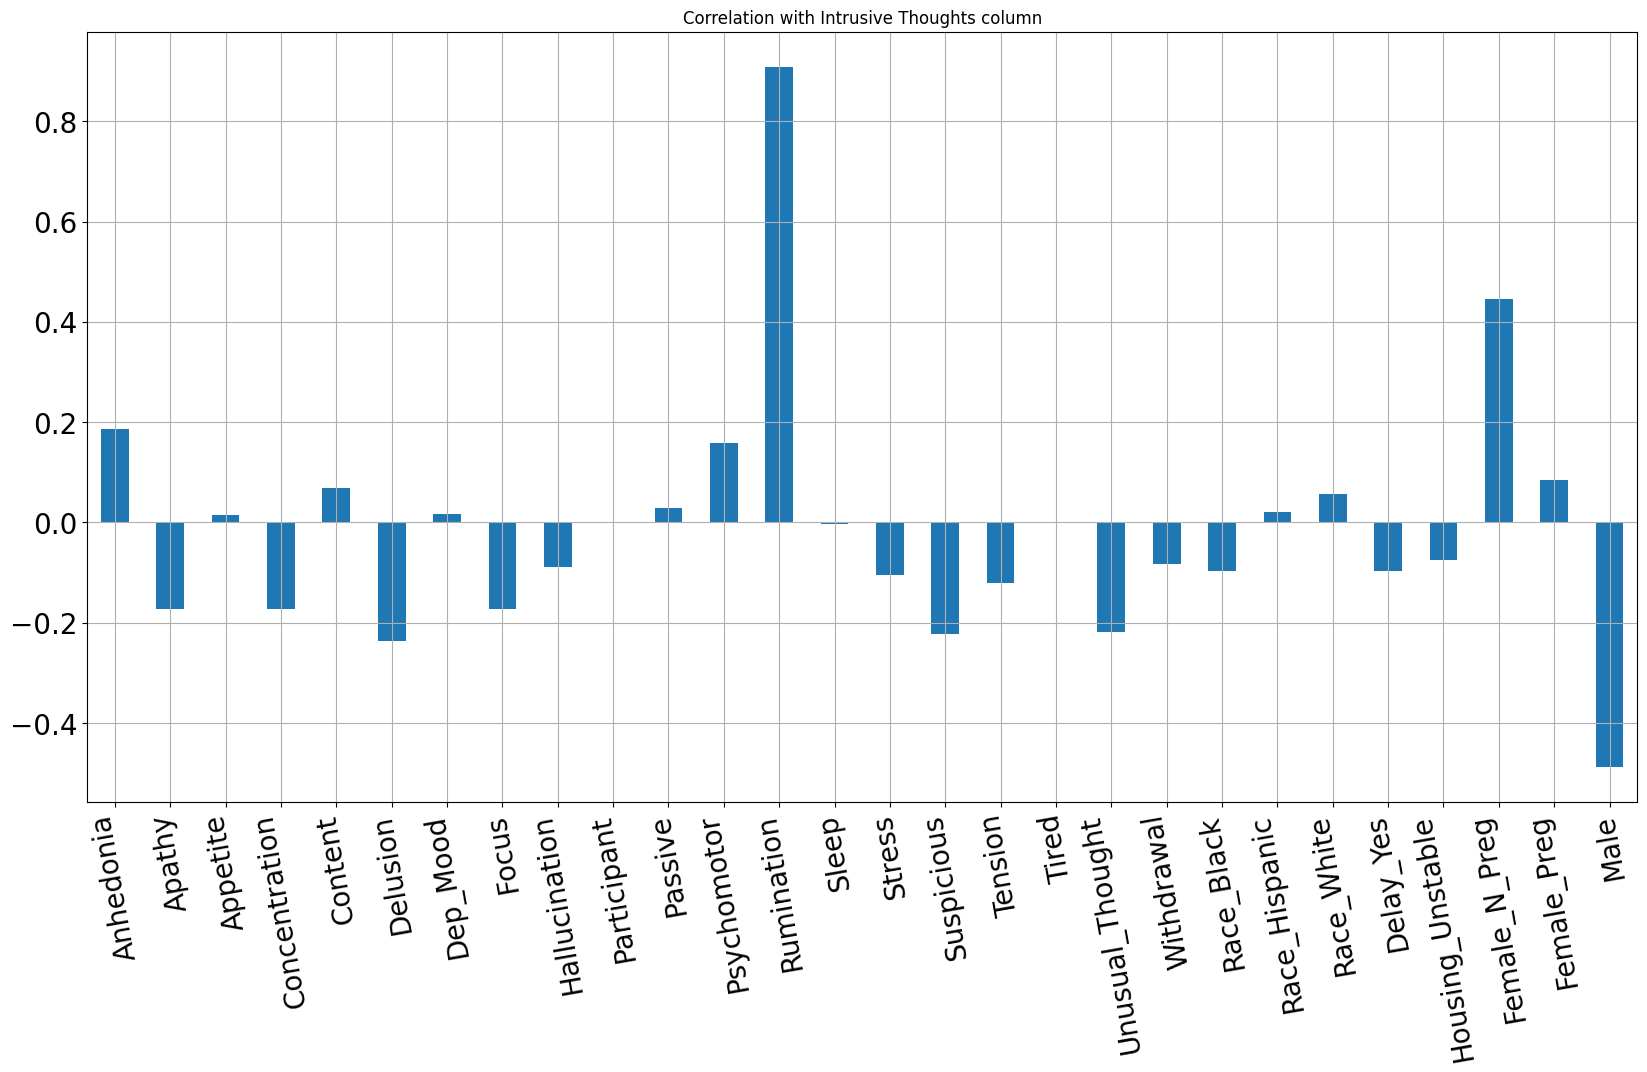

In [116]:
"""
Identify the correlation 
reference https://www.kaggle.com/code/sid321axn/principal-component-analysis-pca
"""

intrusive_dropped = df.drop(['Intrusive_Thoughts'],axis=1)
intrusive_dropped.corrwith(df['Intrusive_Thoughts']).plot.bar(
        figsize = (20, 10), title = "Correlation with Intrusive Thoughts column", fontsize = 20,
        rot = 100, grid = True)

#

In [117]:
# Identify how many -999 values in 'Passive' correlate with null values in 'Intrusive Thoughts'
null_thoughts = df.loc[df['Intrusive_Thoughts'].isnull(), 'Passive'].values
print(null_thoughts)

# Calculate the total number of -999 values correlated with nans in 'Intrusive_Thoughts'
print(Fore.YELLOW + f"Total number of -999 values correlated with nans in 'Intrusive_Thoughts' \n",Style.RESET_ALL, 
      f"\n{len(df.loc[df['Intrusive_Thoughts'].isnull(), 'Passive'].values)}\n")

[-999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999. -999. -999. -999. -999. -999. -999. -9

#

In [118]:
"""
As the total number of rows which both have a null value in 'Intrusive_Thoughts' and -999 value in 'Passive' (667) is
identical to the total rows of nulls in 'Intrusive_Thoughts' column, that means that those are erroneous values and will 
be delt with. However, as there are more -999 values than there are nans in 'Intrusive_Thoughts', I will replace these values
with nans, so that all nan values can be dealt with after all together.
"""

# Create functions to replace values with Nans
def replace_value_with_nan(df, column, value):
    df[column] = df[column].replace(value, np.nan)
    return df

# Replace -999 values with null values
final_df = replace_value_with_nan(df, 'Passive', -999)
final_df


,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Participant,Passive,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal,Race_Black,Race_Hispanic,Race_White,Delay_Yes,Housing_Unstable,Female_N_Preg,Female_Preg,Male
2733,7.511222,3.214647,21.322569,5.120233,0.028234,2.910855,6.025506,5.120233,12.091295,4.230655,1,4.541374,2.003382,2.706820,6.957753,2.829776,3.535951,2.212168,4.611377,3.612508,1.832986,0,0,1,1,0,0,0,1
447,6.591011,-0.049957,8.311399,4.506714,0.298644,1.645901,6.694196,4.506714,3.257318,9.829754,1,NaN,4.861694,9.380876,8.148410,1.964813,1.943945,2.100494,4.743555,0.650661,2.090770,0,0,1,0,0,1,0,0
970,5.420291,3.949330,32.788126,4.673517,0.092967,1.831145,7.012240,4.673517,3.896708,3.618187,1,6.159434,5.943135,4.191846,6.850871,-0.382840,1.417750,0.389544,6.199795,3.867467,3.043989,0,0,0,0,0,0,0,1
125,4.957836,4.690158,45.111014,5.996821,0.015960,3.210937,0.000000,5.996821,65.372328,2.141766,1,4.208126,4.617906,3.284898,7.786659,6.785735,NaN,7.345697,3.561292,4.985110,4.436856,0,0,1,1,0,1,0,0
798,4.490208,5.476981,18.301407,7.056478,0.008111,4.062034,7.665999,7.056478,33.116108,0.197967,1,4.036417,4.575869,3.121595,6.902688,7.049740,5.119751,8.587809,5.531263,4.461778,4.245107,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,6.725006,1.918994,8.169467,5.589702,0.760803,1.295013,0.000000,5.589702,9.407243,5.869601,1,3.244326,7.866286,5.743247,7.729517,4.228726,NaN,5.162795,7.295576,2.904723,5.122506,1,0,0,0,0,1,0,0
3441,6.063447,2.847081,19.044074,6.906872,0.126928,4.465211,0.000000,6.906872,47.573668,9.610266,1,2.250201,4.044177,9.714677,9.007035,5.494240,NaN,7.040737,3.095481,2.820028,4.464137,1,0,0,1,0,0,1,0
1344,6.345897,2.040452,18.269760,7.980328,0.081290,3.162586,6.888158,7.980328,41.615916,5.205986,1,6.822599,4.482281,3.986344,6.233932,0.067265,3.589124,1.513339,6.809418,2.742578,3.463449,0,0,1,0,0,0,0,1
4623,8.762401,3.293441,43.413205,4.685891,0.089618,1.963896,0.000000,4.685891,2.651007,7.101686,1,3.271293,6.264637,7.274542,4.948308,2.291452,NaN,3.185660,7.666773,2.399571,4.719652,0,0,1,0,0,1,0,0


#

#

---------------------------------------------------------------------------------------------------------------------------

                                                Correlation

#

#

I will be analysing correlations between feature variables to gain insights into their relationships and underlying patterns within the datas structure. This will help me select the most relevant and remove any redundant features prior machine learning models, to prevent over/underfitting of the data and decrease their complexity, jeopradizing the ML models performance. 

#

<AxesSubplot: title={'center': 'Overall Correlation Between All Columns'}, xlabel='Column Name', ylabel='Column Name'>

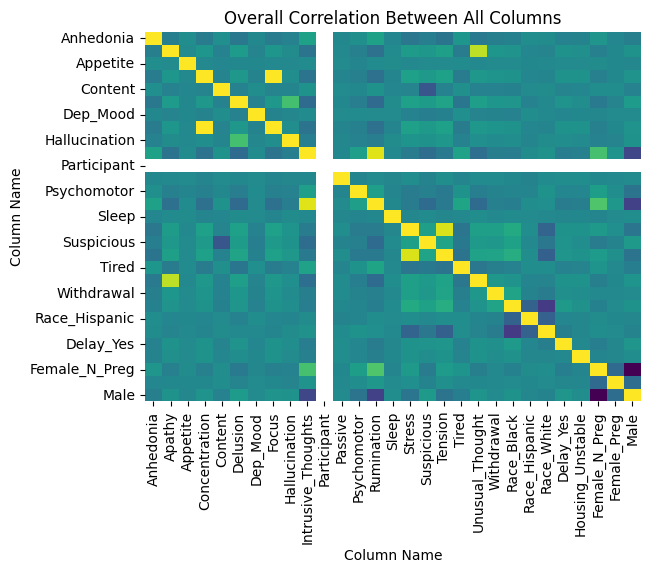

<Figure size 1200x2000 with 0 Axes>

In [119]:
# Create heatmap
correlation_heatmap = sns.heatmap(final_df.corr(),cbar=False, cmap='viridis')

# Add labels
plt.figure(figsize=(12, 20))
correlation_heatmap.set_title('Overall Correlation Between All Columns')
correlation_heatmap.set_ylabel('Column Name')
correlation_heatmap.set_xlabel('Column Name')

# Show heatmap
correlation_heatmap

#

As shown by the heatmap, there are strong correlations within the dataset, both positive (yellow) and negative (dark blue). However, to identify which column relations are more significant than others, I will plot only the ones that have over +/-0.5 correlation. This will help me prioritise on which columns I should focus on next. 

#

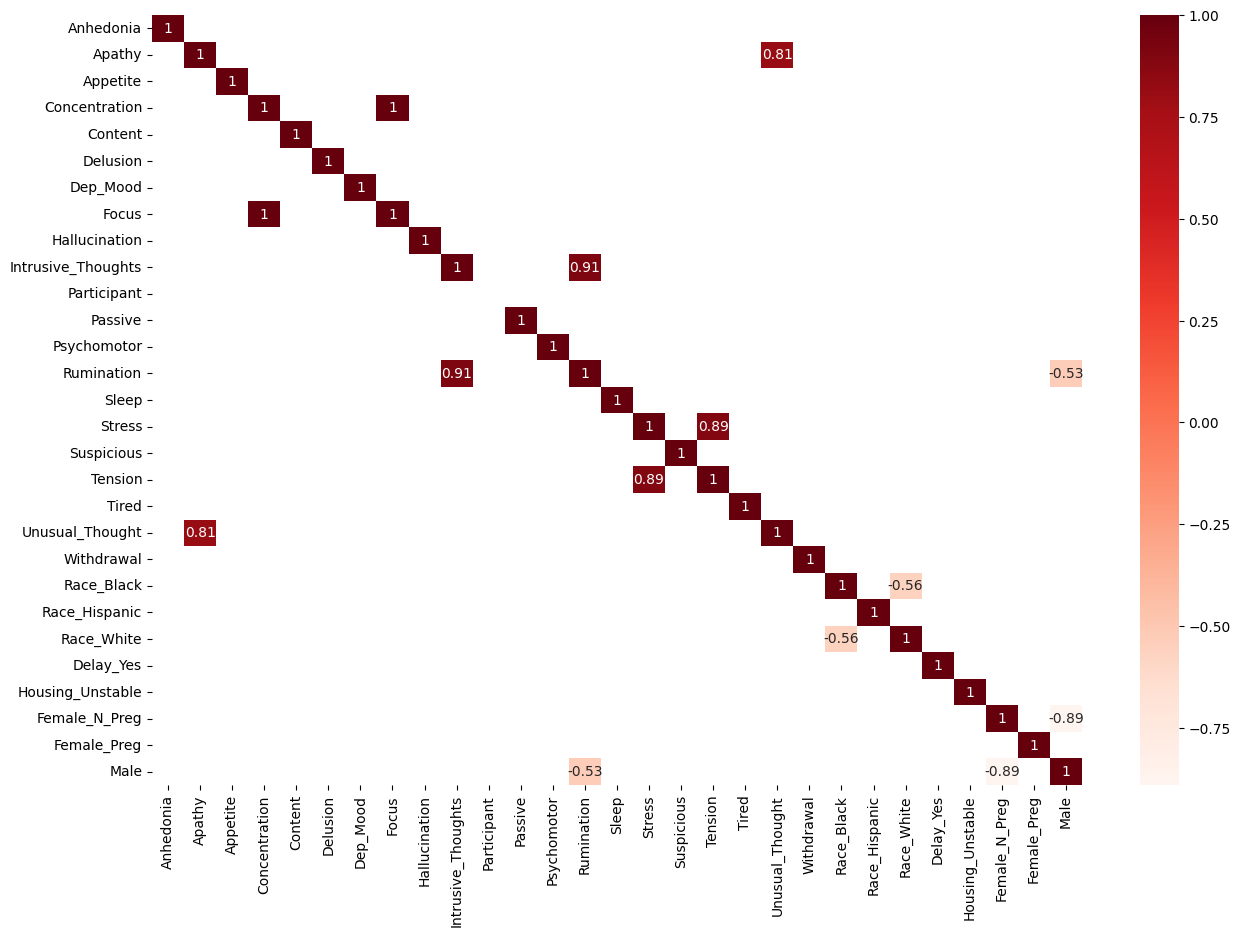

In [120]:
# reference https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

sz_df_corr = final_df.corr()
filtered_corr = sz_df_corr[((sz_df_corr >= .5) | (sz_df_corr <= -.5))]
plt.figure(figsize=(15,10))
sns.heatmap(filtered_corr, annot=True, cmap="Reds")
plt.show()

#

The plot above outlines the main columns to focus on for feature engineering.
- correlation of 1 between 'Focus' and 'Concentration'
- correlation of 0.9 between 'Rumination' and 'Intrusive_Thought'
- correlation of 0.89 between 'Tension' and 'Stress'
- correlation of 0.81 between 'Unusual_Thought' and 'Apathy'
- correlation of -0.89 between 'pregnant_0.0' and 'pregnant_nan'

The correlation of 1 between 'Focus' and 'Concentration' suggests that they are both the same duplicated column. If this is correct, one of the columns will be removed due to the high correlation shared, may impact the performance of the future ML model. However, before I remove one of the columns, I want to ensure this is correct. 

#

In [121]:
# Identify the number of shared values between the columns
print(f"\nNumber of shared values between 'Focus' and 'Concentration' ", 
      Fore.YELLOW,f"{len(final_df[final_df['Focus'].isin(final_df['Concentration'])])}\n")

# Check if the two columns are duplicated
print(Style.RESET_ALL, f"\nAre 'Focus' and 'Concentration' duplicated columns? ", 
      Fore.YELLOW,f"{final_df['Focus'].equals(final_df['Concentration'])}\n")



Number of shared values between 'Focus' and 'Concentration'   4000

 
Are 'Focus' and 'Concentration' duplicated columns?   True



#

In [122]:
"""
Before I remove the duplicated column from the dataset, I want to check whether there are any particpants that
have been duplicated, I will do so by identifying the columns with unique values, as a lot of the columns in the dataset
are binary. Check whether there are any duplicated  values within that column, which would indicate a duplication of a 
participant.
"""

# Get the list of columns with unique values
unique_cols = final_df.columns[final_df.nunique() == len(final_df)]


# Identify the number of duplicates in the unique columns
print(Style.RESET_ALL, f"\nNumber of duplicated rows: ", 
      Fore.YELLOW,f"{(final_df.duplicated(subset=unique_cols)).sum()}\n")

 
Number of duplicated rows:   0



Now that I have checked there are no duplicated participants within the dataset, I will go back to the highly correlated features. As they all hold correlation greater than 0.8, which may indicate they are redundant in the information they provide, removing one of the correlated columns reduces the dimensionality of the dataset, avoiding the multicollinearity problem. This is the case if the columns are measuring the same features, for example 'Tension' and 'Stress' measure similar concepts. However, if they measure different concepts, for example 'Apathy' and 'Unusual_Thoughts', dropping one of these columns would have a significant impact on the ML model. 

The 'pregnant_0.0' and 'pregnant_nan' dummy variable columns also experience high negative correlation of -0.89 with each other. However, this is to be expected, as the variables were created from the original categorical variable and so are not independent from one another. 

Therefore, I will drop the columns which measure a similar concept, i.e. 'Stress' and 'Intrusive_Thought'. I picked 'Intrusive_Thought' over 'Rumination' as 'Intrusive_Thoughts' has a large proportion of data missing, making 'Rumination' more ideal to keep. will not yet drop 'Apathy' and 'Unusual_Thoughts', nor 'pregnant_0.0' and 'pregnant_nan' to avoid losing valuable information. However, if they are altering the ML models performance, they will be reavaluated later on during principal component analysis (PCA).

#

In [123]:
# Create a function to drop columns
def drop_columns(df, cols):
    """
    Drops the specified columns from the DataFrame.

    Args:
        df= The DataFrame to drop columns from.
        cols = column names to drop.

    Returns:
        A new DataFrame with the specified columns dropped.
    """
    return df.drop(cols, axis=1)

# Dropping highly correlated and duplicated columns
final_df = drop_columns(final_df, ['Stress', 'Intrusive_Thoughts', 'Concentration'])


#

---------------------------------------------------------------------------------------------------------------------------

                                                Distribution

#

Analysing the distribution of data is vital to identifying any anomalous values or outliers in a dataset. These values  have great impact on the performance of a ML model, if they're extreme or occur frequnetly, they pull the predictions away from the true values. Consequently, they need to be removed/imputed.

Further, the nature of the outliers needs to be considered. For example, if the outliers are genuine data points that represent actual phenomena, it may be important to keep them in the analysis as they represent unusual but valid responses to treatment.
Size of the dataset: The size of the dataset can also impact the decision to keep or remove outliers. In larger datasets, the impact of outliers may be diluted, making it less important to remove them. However, in smaller datasets, outliers can have a more significant impact on model performance, making it more important to remove them.

#

In [124]:
"""
Identify the number of duplicated values in the sz dataframe only within the numeric columns. 'Participant' 
column has a range of 0, suggesting that all the participants have the same value, i.e. each row resembles
1 participants. 'Hallucination' and 'Passive' have a wide range of data points.
"""

print(Fore.YELLOW + f"\nRange of numbers in numeric columns:'\n", Style.RESET_ALL)

for col in final_df.columns:
    print('{} : {}'.format(col,np.ptp(final_df[col]))) 


Range of numbers in numeric columns:'
 
Anhedonia : 10.504285494000001
Apathy : 12.014443861
Appetite : 113.297659943
Content : 21.001117307
Delusion : 11.105822546
Dep_Mood : 12.00355008
Focus : 10.071462192999999
Hallucination : 6287.10737298
Participant : 0
Passive : nan
Psychomotor : 10.047979699999999
Rumination : 12.418698382
Sleep : 9.77558687
Suspicious : nan
Tension : 11.149782499999999
Tired : inf
Unusual_Thought : 10.048128558999998
Withdrawal : 9.551778619
Race_Black : 1
Race_Hispanic : 1
Race_White : 1
Delay_Yes : 1
Housing_Unstable : 1
Female_N_Preg : 1
Female_Preg : 1
Male : 1


#

From looking at the range of numbers within each column of the dataset, there were some peculiar outcomes:

- 'nan' for 'Suspicious' and 'Passive'
- 'inf' for the column 'Tired'
- 'Hallucination' has an extremely large range of values (6287)
- 'Apetite' has a large range (113)
- 'Participant' has no range in values

The 'inf' range suggests there's an infinite range of numbers due to an infinite numerical value within the column. Therefore, to gain more insight into the reasoning behind this,  I will use the .describe() method to get more in depth summary statistics on these columns.

#

In [125]:
# Perform summary statistics
final_df[['Suspicious', 'Tired']].describe()

,Suspicious,Tired
count,1678.000000,4000.000000
mean,2.726915,inf
std,1.468704,NaN
min,-1.682951,0.687499
25%,1.691701,4.527153
50%,2.707226,5.522291
75%,3.672909,6.576730
max,8.212275,inf


#

In [126]:
# Identify the total number of infinite values in the 'Tired' column
print(Style.RESET_ALL, f"\nTotal number of infinite values in 'Tired': ", 
      Fore.YELLOW,f"{len(final_df.loc[final_df['Tired'] == np.inf])}\n")

#replace the infinite values with null values in 'Tired' column
final_df = replace_value_with_nan(final_df, 'Tired', [np.inf, -np.inf])

# Check the outcome of replacing the infinite values with NaNs
final_df['Tired'].describe()

 
Total number of infinite values in 'Tired':   59



count    3941.000000
mean        5.526572
std         1.488377
min         0.687499
25%         4.498435
50%         5.493226
75%         6.533133
max        11.454125
Name: Tired, dtype: float64

#

#

Now that the infinite values have been replaced with nans from the 'Tired' column, I will further look into the datas distribution to try identify any more anomalous values that can be turned into null values, before I identify the best method to deal with all of them at once. I will do so by looking at the distribution of data via boxenplots.

#

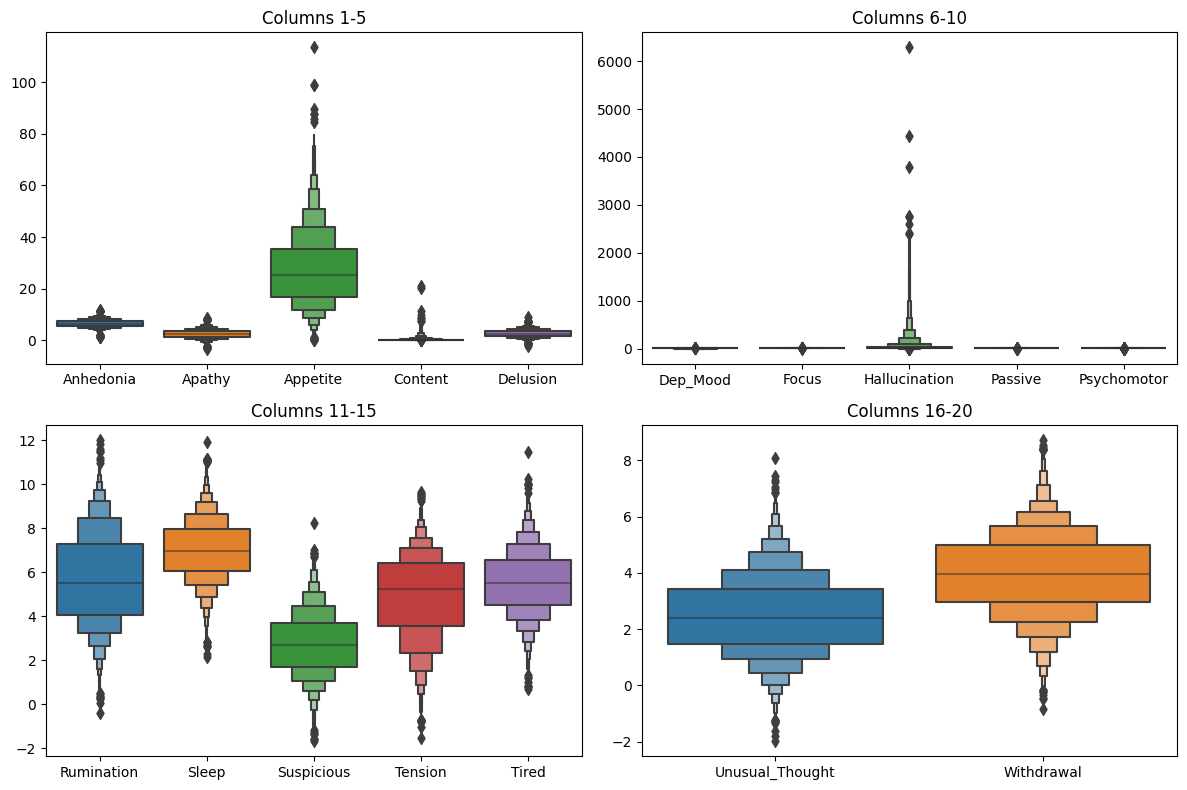

In [127]:
# Define the columns to plot
cols_to_plot = ['Anhedonia', 'Apathy', 'Appetite', 'Content', 'Delusion',
                'Dep_Mood', 'Focus', 'Hallucination', 'Passive', 'Psychomotor', 
                'Rumination', 'Sleep', 'Suspicious', 'Tension', 'Tired', 
                'Unusual_Thought', 'Withdrawal']



# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Create the four boxen plots using a for loop
for i, ax in enumerate(axs.flatten()):
    start = i * 5
    end = start + 5
    sns.boxenplot(data=final_df[cols_to_plot[start:end]], ax=ax)
    ax.set_title(f'Columns {start+1}-{end}')

plt.tight_layout()
plt.show()

#

As shown by the boxenplots, the distribution of data highly varies between columns. 'Appetite' and 'Hallucination' columns are of particular interest as they visually are abnormal to the rest of the columns, with a much larger data distribution, suggesting there is a large range of data within the columns, which coincides with the found large data range of 6287 for 'Hallucination' and 113 for 'Appetite'. The large range indicates that the values skew from the norm. Therefore, to further explore this I will be looking at the datasets skewness.

#

In [128]:
# Identify the datafranes skew for each column
print('skewness values: \n', final_df.skew())

skewness values: 
 Anhedonia            0.066783
Apathy               0.152135
Appetite             0.852374
Content             11.517900
Delusion             0.267175
Dep_Mood            -0.828277
Focus                0.029484
Hallucination       12.410915
Participant          0.000000
Passive             -0.038060
Psychomotor         -0.027370
Rumination           0.190745
Sleep               -0.024516
Suspicious           0.149939
Tension             -0.464052
Tired                0.069650
Unusual_Thought      0.241213
Withdrawal          -0.029254
Race_Black           0.630360
Race_Hispanic        2.075784
Race_White           0.553207
Delay_Yes           -0.058046
Housing_Unstable     3.555608
Female_N_Preg        0.026012
Female_Preg          3.783343
Male                 0.207179
dtype: float64


#

As found above, there are several columns that skew from the Gaussian distribution of 0, including 'Hallucination' (which coincides with the boxenplots) and content. To help visualise the data, I'll plot histograms for all columns which have a unique value above 2. The skew of 3 for 'Housing_Unstable' and 'Female_Preg', and skew of 2 for 'Race_Hispanic'  columns are explained as they are binary features.

#

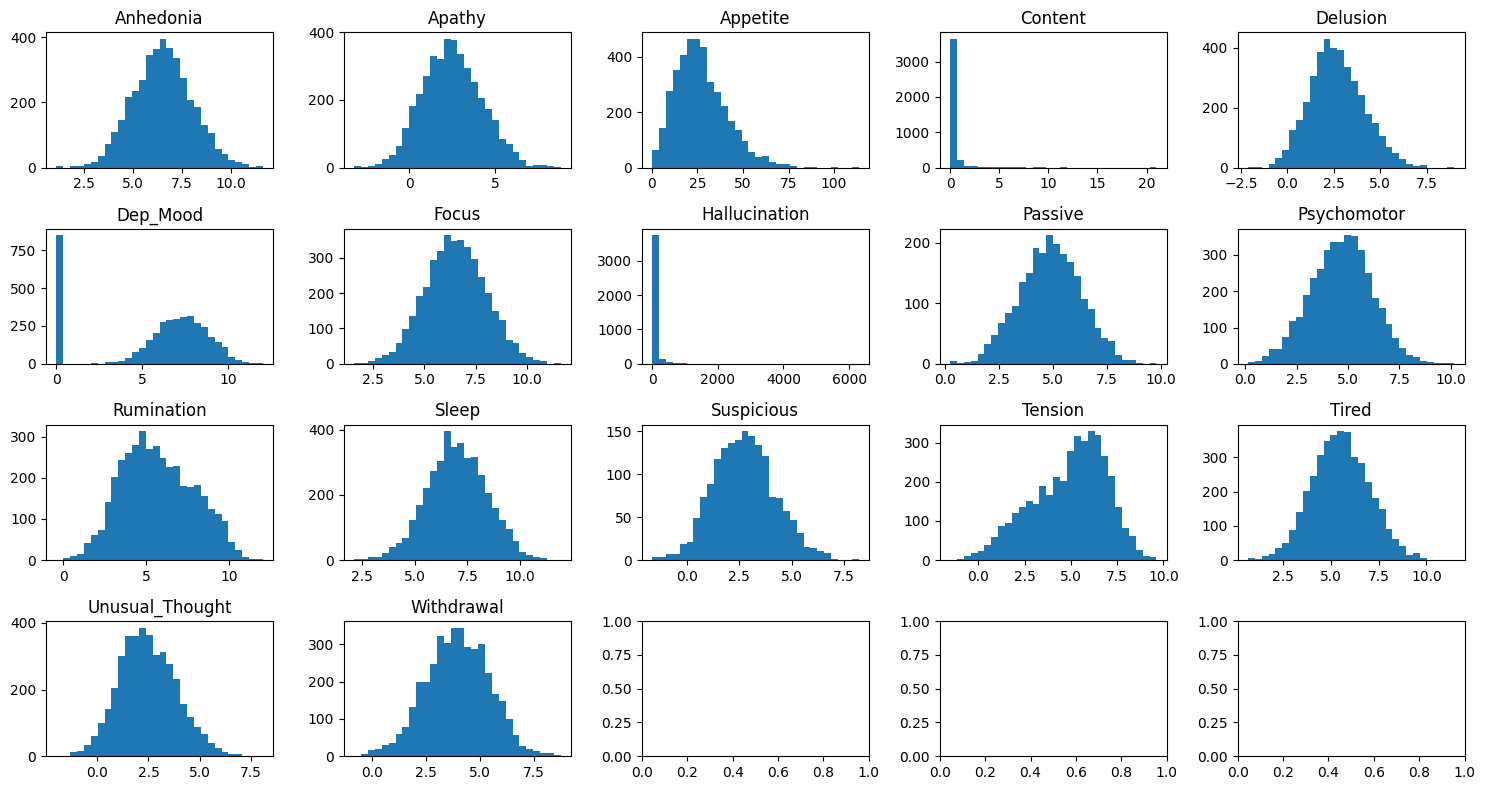

In [129]:
# Define the columns to plot having more than 2 unique values
cols = final_df.columns[final_df.nunique() > 2]

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Plot histograms for each column in the selected list
for i, col in enumerate(cols):
    axes[i].hist(final_df[col], bins=30)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#

#


Column  Anhedonia  is   normally distributed 

Column  Apathy  is  not normally distributed 


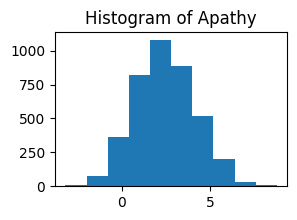


Column  Appetite  is  not normally distributed 


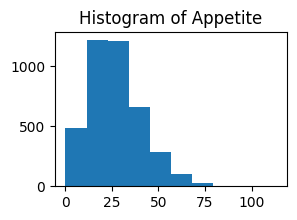


Column  Content  is  not normally distributed 


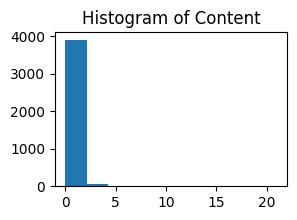


Column  Delusion  is  not normally distributed 


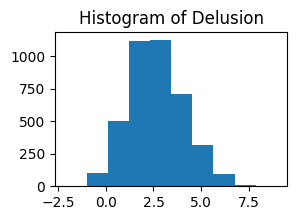


Column  Dep_Mood  is  not normally distributed 


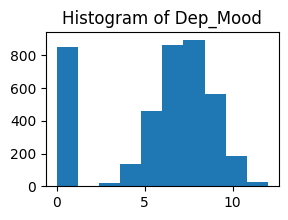


Column  Focus  is   normally distributed 

Column  Hallucination  is  not normally distributed 


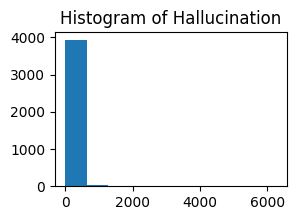


Column  Passive  is   normally distributed 

Column  Psychomotor  is   normally distributed 

Column  Rumination  is  not normally distributed 


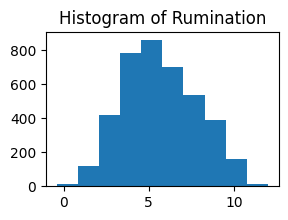


Column  Sleep  is   normally distributed 

Column  Suspicious  is   normally distributed 

Column  Tension  is  not normally distributed 


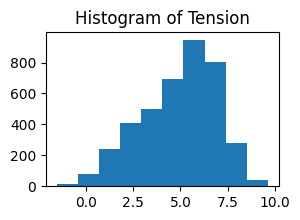


Column  Tired  is   normally distributed 

Column  Unusual_Thought  is  not normally distributed 


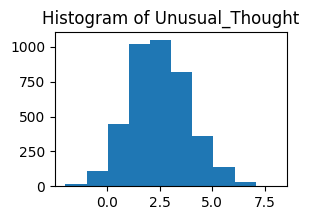


Column  Withdrawal  is   normally distributed 


In [130]:
""" 
To have a more in depth indication of the skew of data, I will incorporate statistical analysis to identify which columns
don't follow normal distribution, via the shapiro test. I will create a for loop which iterates through all columns that have
over 2 unique values. For each non normal data column, a histogram will be plotted  for a visual representation. This 
objective testing paired with histograms provide more knowledge on the data to gain more insight, helping know which columns
to prioritise.
"""


for col in final_df:
    unique_vals = final_df[col].nunique()
    if unique_vals > 2:
        stat, p = stats.shapiro(final_df[col])
        alpha = 0.05
        if p > alpha:
            print(f"\nColumn", Fore.GREEN, f"{col}", Style.RESET_ALL, "is", 
            Fore.GREEN, f" normally distributed", Style.RESET_ALL) 
        else:
            print(f"\nColumn", Fore.RED, f"{col}", Style.RESET_ALL, "is", 
            Fore.RED, f"not normally distributed", Style.RESET_ALL) 
            plt.figure(figsize=(3,2)) 
            plt.hist(final_df[col])
            plt.title(f'Histogram of {col}')
            plt.show()

#

Interestingly, whilst all the 'non normal' columns were relatively skewed and 'Hallucination', 'Content' and 'Appetite' had drastic skews, all with one peaks in their distribution. The column 'Dep_Mood' had two peaks within its distribution which were abnormal to the rest of the datas distribution. I'll further investigate this by looking at the most common data within the column, via mode.

#

In [131]:
# Identify the most common value in 'Dep_Mood' column
mode_dep_mood = final_df['Dep_Mood'].mode()[0]

print('The most common value in the column is:', mode_dep_mood)

# Identify the top 3 values in the column, and their count
top_values = final_df['Dep_Mood'].value_counts().nlargest(3)
top_values

The most common value in the column is: 0.0


0.000000    851
6.025506      1
6.788792      1
Name: Dep_Mood, dtype: int64

#

The zero's could potentially mean that the participants don't have a depressed mood. However, as I don't know the context of the data, I will catwgorise the 0's as an erroneous value instead, due to the amount it is present within the dataset.

#


The new skew of 'Dep_Mood' after 0 were replaced:
  -0.05225457581193189



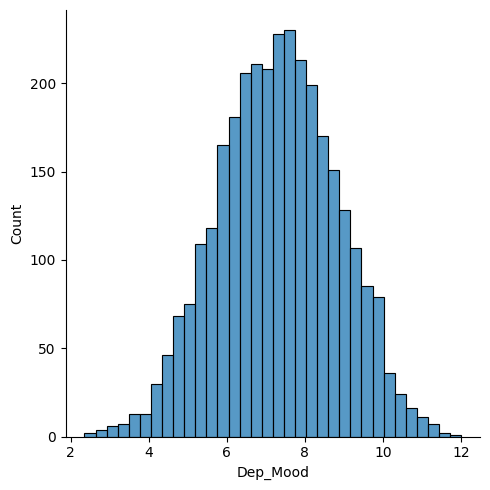

In [132]:
""" 
As identified via the mode, the most column value within the 'Dep_Mood column is 0, which has a count of 688 within the
column. This makes up for a large proportion of the column, where the rest of the values are unique. This suggests that the
0.0 value may indicate a missing value, thus needs to be handled appropriately. I will do so by turning the value into a null
and identifying whether this alters the columns skew/distribution, via a distribution plot.
"""

# Replace 0 with NaN in "Dep_Mood"
final_df = replace_value_with_nan(final_df, 'Dep_Mood', 0)

# Check the skew of the data
print(Fore.YELLOW + f"\nThe new skew of 'Dep_Mood' after 0 were replaced:\n", Style.RESET_ALL,
      f"{final_df['Dep_Mood'].skew()}\n")

# Show a visual representation
sns.displot(final_df['Dep_Mood'])
plt.show()

#

By replacing the 0 with NaNs in 'Dep_Mood', the distribution became more Gaussian, making it more suitable for upcoming ML models. Now that I have gathered the missing values within the dataset, many of which are MNAR (DeJesus, 2021), which creates a risk of introducing bias, and decreasing accuracy of predictions for the ML model (Lodder, 2013). Consequently, it is important I will deal with them correctly.

#

In [133]:
""" 
As observed in the plotted histograms, there are many skewed columns. I want to identify whether the skew is the result
of many outliers within a column. To identify the proportion of outliers within a column, I will be using the interquartile
range to identify which data points don't fit within the datas distribution and so are categorised as 'outliers'. """
# Create a list of column names that have more than 2 unique values
unique_cols = [col for col in final_df.columns if final_df[col].nunique() > 2]

outliers = []
for col in unique_cols:
        q1 = final_df[col].quantile(0.25)
        q3 = final_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        num_outliers = final_df[(final_df[col] < lower_bound) | (final_df[col] > upper_bound)][col].count()
        prop_outliers = (num_outliers / len(final_df[col]) * 100).round(2)
        outliers.append(prop_outliers)

# Create a pandas Series object containing the proportion of outliers for each column
prop_outliers = pd.Series(outliers, index=unique_cols)

# Print the proportion of outliers for each column
print(prop_outliers)

Anhedonia           0.92
Apathy              0.68
Appetite            1.82
Content            11.68
Delusion            0.60
Dep_Mood            0.32
Focus               0.65
Hallucination      13.02
Passive             0.30
Psychomotor         0.57
Rumination          0.00
Sleep               0.62
Suspicious          0.35
Tension             0.08
Tired               0.43
Unusual_Thought     0.60
Withdrawal          0.82
dtype: float64


#

A high proportion of outliers is another indicator that the data is skewed/dispersed, or the presence of errors or anomalies is high in the data. If the proportion of outliers remains below  5%, it may not be necessary to remove and include in the analysis as they may provide valuable information. However, if the proportion of outliers is very high, for example reaching the threshold of 10%, it is important I determine whether they are legitimate data points or if they should be discarded.


#

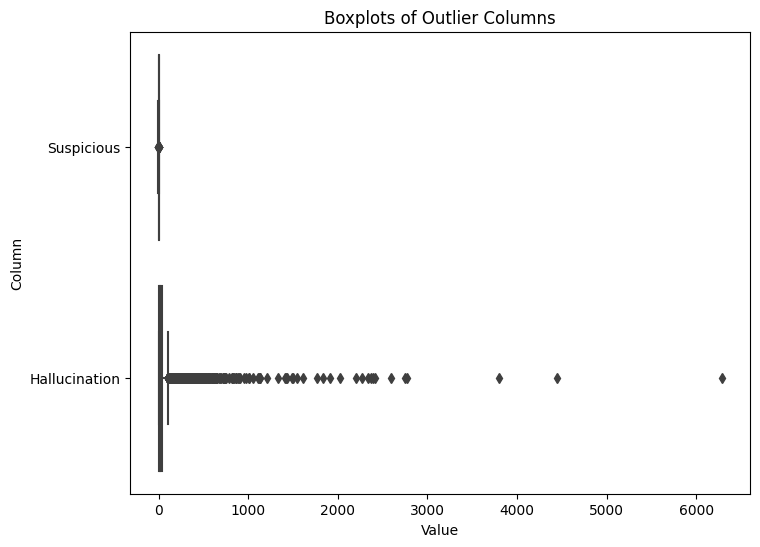

In [134]:
""" 
From the above identification of outliers using the IQR, I will plot a boxplot the top 2 columns which have outliers, 
Hallucination with 13% of its data being outliers, and Content with 11% of its data consiting of outliers. This will help 
me visualise how the outliers affect the datasets.
"""

# Boxplot for outlier columns
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=final_df[['Suspicious', 'Hallucination']], orient='h', ax=ax)
ax.set_title('Boxplots of Outlier Columns')
ax.set_xlabel('Value')
ax.set_ylabel('Column')
plt.show()

#

The boxplot above shows the large volume of outliers in 'Halluincation' overpowers the 'Suspicious' column. However, 'Halluciantion' had previously no missing values and so all the datapoint observed is true data gathered from participants. Whereas 'suspicious' column was originally the top column with the highest amount of missing values, with the column missing around 60% of the data. Because of this, I have decided to drop the 'Suspicious' column as I don't think it will be adding any extra value into the ML model, whereas 'Hallucination' may provide information from which the model can be trained on.


#

In [135]:
# Drop the outlier and missing value column
final_df = drop_columns(final_df, ['Suspicious'])

#

#

Now the the column with highest missing values and a large proportion of its data consisting of outliers has been dropped, I will be dealing with null values, trying to identify the best method to impute them for an optimal ML model.

#

In [136]:
# Identify the remaining columns with missing values
missing_cols = final_df.columns[final_df.isna().any()].tolist()
missing_cols

['Dep_Mood', 'Passive', 'Tired']

#

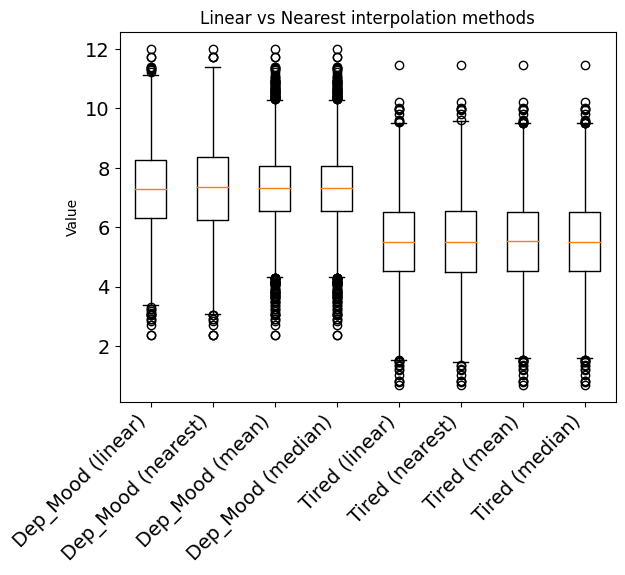

In [137]:
"""
Plot a boxplot for a comparison of different method that can be used to fill missing values, this will help me identify
the ideal method for imputations, including interpolation methods 'linear' and'nearest' and the mean and median.
"""

# Columns to interpolate
interpolate_cols = ['Dep_Mood', 'Tired', 'Passive']

# interpolate missing values with different methods
df_linear = final_df[interpolate_cols].interpolate(method='linear')
df_nearest = final_df[interpolate_cols].interpolate(method='nearest')
df_median = final_df[interpolate_cols].fillna(final_df[interpolate_cols].median())
df_mean = final_df[interpolate_cols].fillna(final_df[interpolate_cols].mean())

# create a boxplot to compare the results
fig, ax = plt.subplots()
ax.boxplot([df_linear['Dep_Mood'], df_nearest['Dep_Mood'], df_mean['Dep_Mood'], df_median['Dep_Mood'], 
            df_linear['Tired'], df_nearest['Tired'], df_mean['Tired'], df_median['Tired']])
ax.set_xticklabels(['Dep_Mood (linear)', 'Dep_Mood (nearest)', 'Dep_Mood (mean)','Dep_Mood (median)',
                    'Tired (linear)', 'Tired (nearest)', 'Tired (mean)', 'Tired (median)'],
                    rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=14) # set labels and titles
ax.set_ylabel('Value')
ax.set_title('Linear vs Nearest interpolation methods')
plt.show()

# show the plot
plt.show()

Even though the interpolation techniques of 'nearest' and 'linear' decrease the number of outliers within the columns in comparison to the median and mean methods, the data within the columns to fill have no relationship or hierachy between adjacent data points. Thus the missing columns will be filled with nearby data that has no relationship with the neighbouring points. Therefore, it is a decision between the median and mean. To decide between these two methods, which have provided much smaller IQR for 'Dep_mood' column and slightly for 'Tired', I will further look as to whether the mean for each of the columns largerly differs from the columns median (below).

#

In [138]:
final_df[['Dep_Mood', 'Passive', 'Tired']].describe()

,Dep_Mood,Passive,Tired
count,3149.000000,2289.000000,3941.000000
mean,7.303839,4.862948,5.526572
std,1.518239,1.422574,1.488377
min,2.352356,0.216098,0.687499
25%,6.255981,3.888435,4.498435
50%,7.317065,4.894876,5.493226
75%,8.367688,5.842857,6.533133
max,12.003550,9.799751,11.454125


#

As shown, the data within the columns with missing values has a symmetrical distribution, where the mean and median are close to each other. Thus, imputing with the mean may be the most ideal appropriate, as the mean wouldn't change from the influence of extreme values.

#

In [139]:
# Create a function to fill missing values with the mean value
def fillna(df, cols):
    mean_vals = df[cols].mean()
    return df[cols].fillna(mean_vals)

# Define the columns to fill with mean
cols_to_fill = ['Dep_Mood', 'Passive', 'Tired']

# Fill nulls with mean values
final_df[cols_to_fill] = fillna(final_df, cols_to_fill)

#

In [140]:
# Check that all the null values have been filled and there are no missing values left each column
print(final_df.isna().sum())

Anhedonia           0
Apathy              0
Appetite            0
Content             0
Delusion            0
Dep_Mood            0
Focus               0
Hallucination       0
Participant         0
Passive             0
Psychomotor         0
Rumination          0
Sleep               0
Tension             0
Tired               0
Unusual_Thought     0
Withdrawal          0
Race_Black          0
Race_Hispanic       0
Race_White          0
Delay_Yes           0
Housing_Unstable    0
Female_N_Preg       0
Female_Preg         0
Male                0
dtype: int64


#

Now that the missing data has been dealt with, I will continue exploring the skew of the data, previously identified by the .skew() function, alongside some histograms. For more insight into the distribution of data, I will now plot Q-Q plots which show a comparison of the sample columns distribution against normal distribution, this will help detect any departures from normality (when the sample plot deviates from the theoretical straight line) and possible outliers.

#

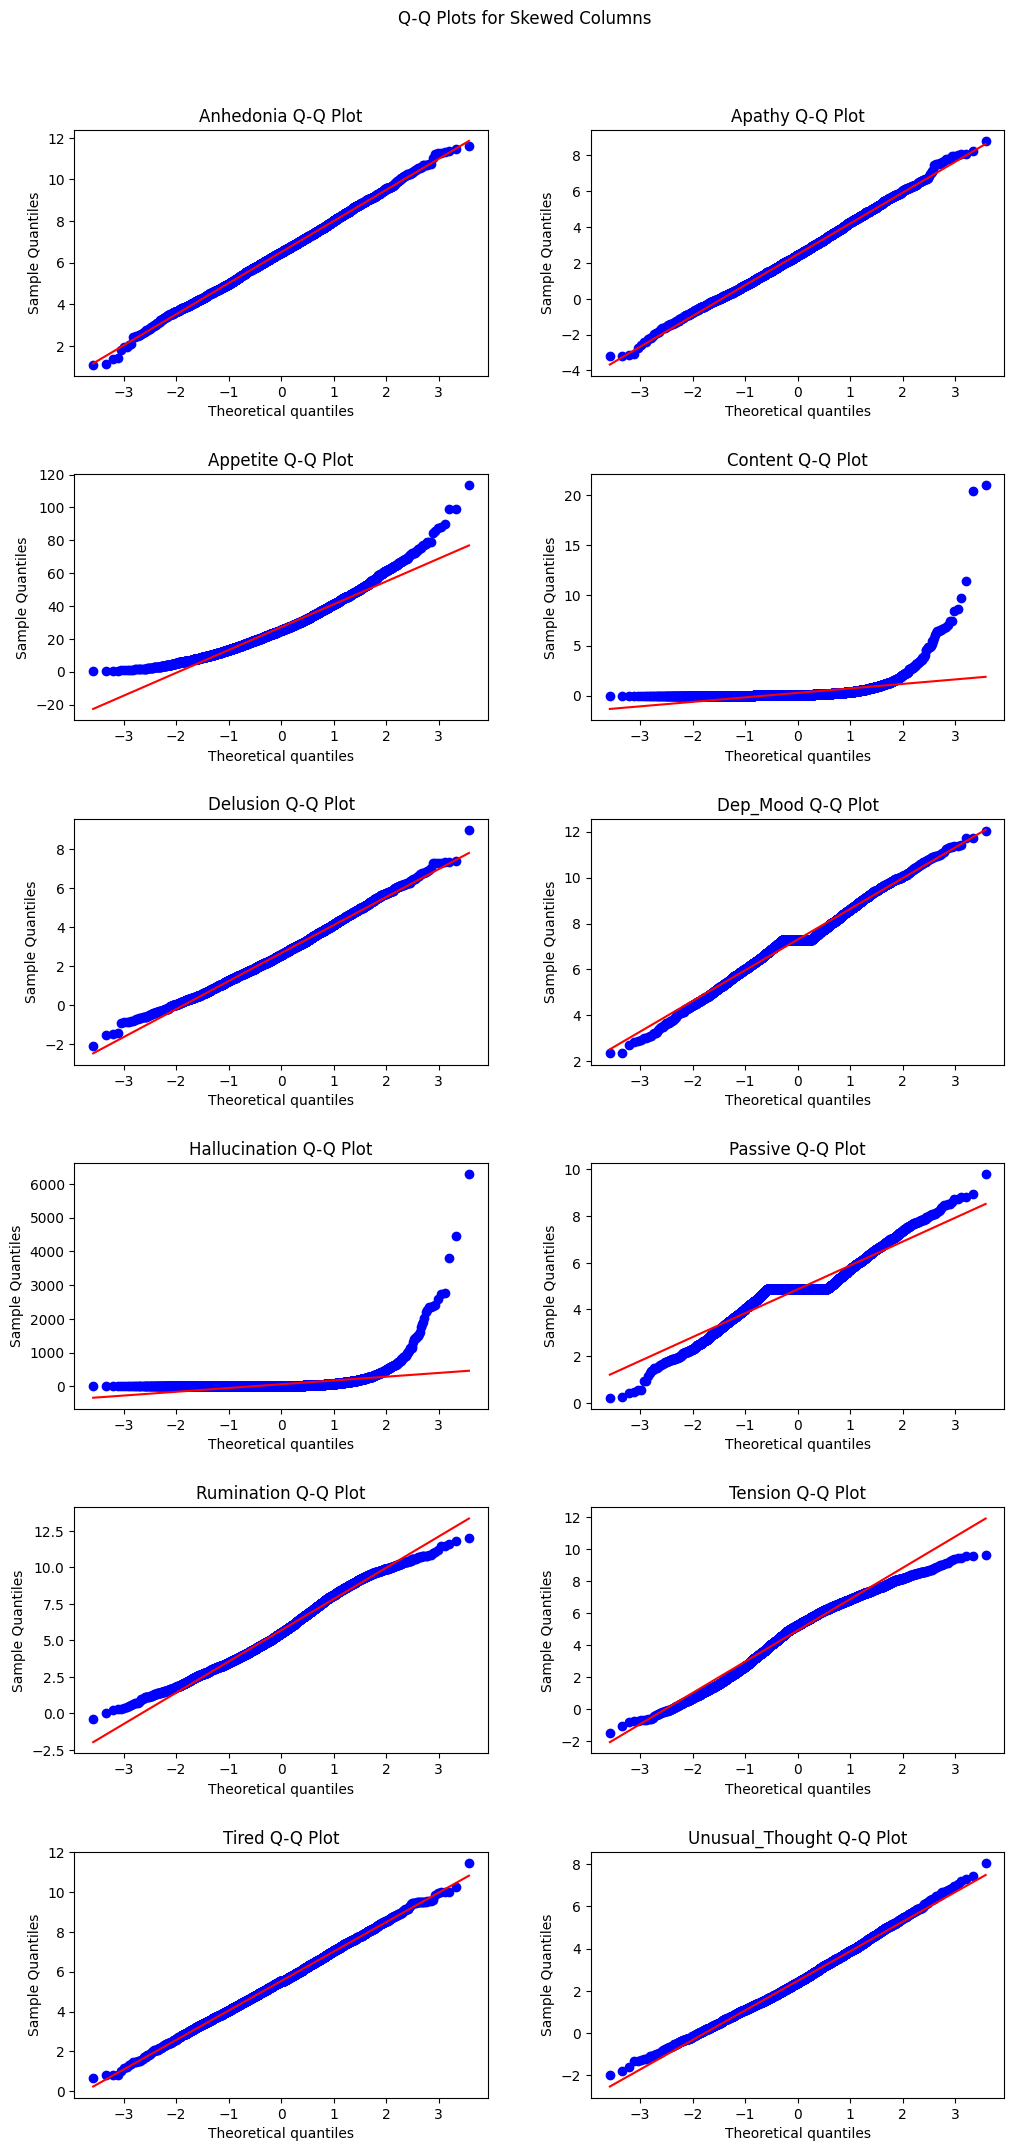

In [141]:
# Identify skewed columns to plot, with over 2 unique values
skewed_cols = []
for col in final_df.columns:
    if final_df[col].nunique() > 2 and abs(final_df[col].skew()) > .05:
        skewed_cols.append(col)

# Plot q-q plots for skewed columns
num_plots = len(skewed_cols)
num_cols = 2
num_rows = (num_plots + 1) // 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
axs = axs.reshape(-1)
for i, col in enumerate(skewed_cols):
    probplot(final_df[col], plot=axs[i])
    axs[i].set_title(f"{col} Q-Q Plot")
    axs[i].set_ylabel('Sample Quantiles')

# Set title and adjust layout
fig.suptitle('Q-Q Plots for Skewed Columns')
fig.subplots_adjust(top=0.93, hspace=0.4, wspace=0.25)

# Show the plot
plt.show()

#


The Q-Q plots for each column provided further evidence alongside the histograms to which columns deviate from the norm. Therefore, it is important to transform the skewed data via normalization techniques, to help make the distrubtion more symmetric and reduce the impact of outliers. The data conforming to normal distribution is desirable by certain ML models,including the linear regression models. 

To choose an appropriate transformation to improve the distributions symmetry, I will be comparing 3 different techniques:
- Logarithmic transformation - ideal for strongly positively skewed data 
- Square root transformation - ideal for positively skewed data (not as strongly as for log), also preserves magnitude of values
- Boxcox transformation - computes a power transformation parameter (lambda) to normalise the data. 

I will assess their transformation effectiveness using histograms as diagnostic plots.


#

#

In [142]:
"""
Identify the columns with positive values, as the boxcox function only allows the transformation on positive values. If the
columns 'Appetite', 'Content' and 'Hallucination' are not positive then I will resort to the boxcox1p function, which allows 
input values that are less than or equal to 0, by adding 1 to each input value before performing the transformation.
"""

# loop over each column and check if all values are positive
positive_cols = []
for col in final_df.columns:
    if (final_df[col] >= 0).all():
        positive_cols.append(col)

# print the list of column names with only positive values
print(positive_cols)

['Anhedonia', 'Appetite', 'Content', 'Dep_Mood', 'Focus', 'Hallucination', 'Participant', 'Passive', 'Psychomotor', 'Sleep', 'Tired', 'Race_Black', 'Race_Hispanic', 'Race_White', 'Delay_Yes', 'Housing_Unstable', 'Female_N_Preg', 'Female_Preg', 'Male']


#

for Appetite, the best lambda value to use is 0.5, which gives the skew of 0.08, which is the closest to the Gaussian distribution.

In [143]:
def plot_transformations(df, col):
    
    min_val = df[col].min() # calculate the min value of the column
    if min_val < 0: # checks whether col has negative values (through min value)
       df[col] = df[col] - min_val + 1e-9 # small constant  added to make values positive, to apply transformations

    # apply transformation methods to the column
    df['log'] = np.log(df[col])
    df['sqrt'] = np.sqrt(df[col])
    df['boxcox'], _ = stats.boxcox(df[col])

    # reverse the effect of the constant on the Box-Cox transformation
    if min_val < 0:
        df['boxcox'] = np.power(df['boxcox'], 1/lambda_) - 1e-9
        # lambda_ = optimal lambda value obtained from the boxcox transformation

    # set up the figure and subplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    axs = axs.flatten()

    # create a list of transformation methods and their corresponding titles
    transformations = [(col, 'Original Skewed Data'),
                      ('log', 'Log Transformation'),
                      ('sqrt', 'Square Root Transformation'),
                      ('boxcox', 'Box-Cox Transformation')]

    # plot the distributions
    for i, (col, title) in enumerate(transformations):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(title)
        axs[i].set_xlabel(col)

    # set the title of the figure
    fig.suptitle(f"A comparison of Histogram for {col} Transformations")
    fig.subplots_adjust(hspace=0.4, wspace=0.25)

    # display the plots
    plt.show()

    # compute skewness of the transformed data
    skew = stats.skew(df[col])
    log_skewness = stats.skew(df['log'])
    sqrt_skewness = stats.skew(df['sqrt'])
    boxcox_skewness = stats.skew(df['boxcox'])

    # compare the skewness of the transformed data
    print(f'Original Skew: {skew:.3f}')
    print(f'Log Transformation Skewness: {log_skewness:.3f}')
    print(f'Square Root Transformation Skewness: {sqrt_skewness:.3f}')
    print(f'Box-Cox Transformation Skewness: {boxcox_skewness:.3f}')

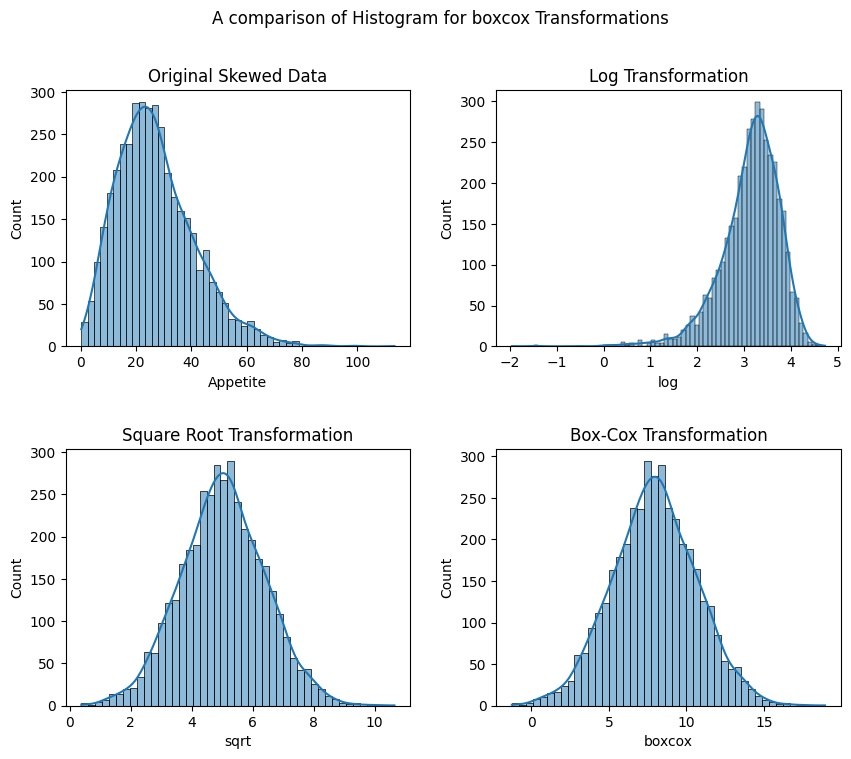

Original Skew: 0.003
Log Transformation Skewness: -1.322
Square Root Transformation Skewness: 0.014
Box-Cox Transformation Skewness: 0.003


In [144]:
# Plot a comparison of transformations on 'Appetite' column
plot_transformations(final_df, 'Appetite')

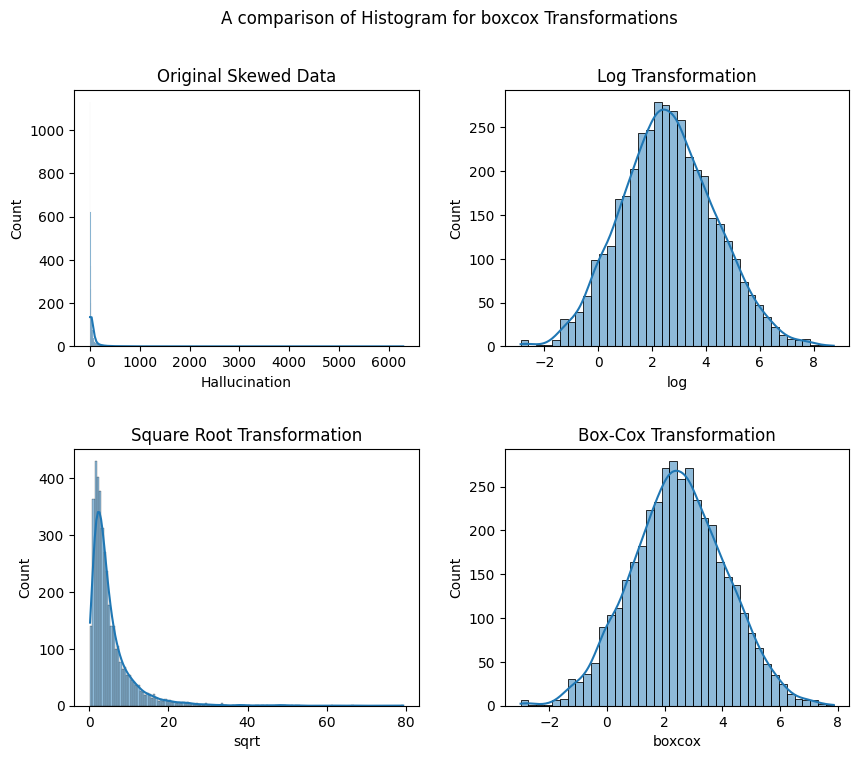

Original Skew: 0.001
Log Transformation Skewness: 0.125
Square Root Transformation Skewness: 3.719
Box-Cox Transformation Skewness: 0.001


In [145]:
# Plot a comparison of transformations on 'Hallucination' column
plot_transformations(final_df, 'Hallucination')

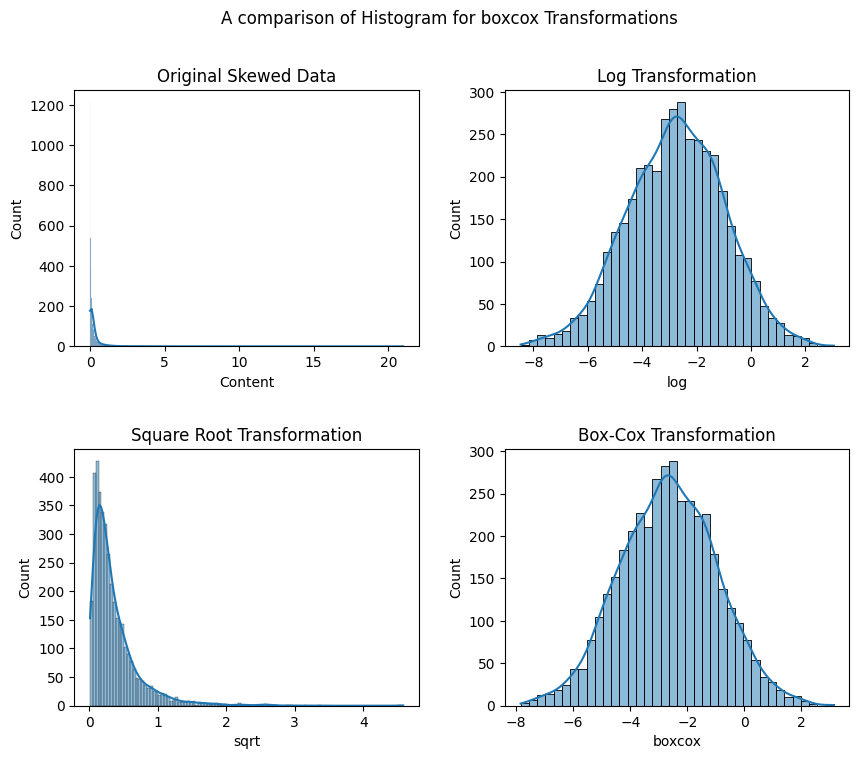

Original Skew: -0.001
Log Transformation Skewness: -0.093
Square Root Transformation Skewness: 3.161
Box-Cox Transformation Skewness: -0.001


In [146]:
# Plot a comparison of transformations on 'Content' column
plot_transformations(final_df, 'Content')

# Drop the added columns
final_df = drop_columns(final_df, ['log', 'sqrt', 'boxcox'])

#

#

The boxcox transformation outperformed the log and square root transformation for all 3 of the variables.

- 'Hallucination' original skew was 12.615, after boxcox transformation = 0.002
- 'Content' original skew was 10.5, after boxcox transformation = -0.001
- 'Appetite' original skew was 0.83, after boxcox transformation = -0.004

Therefore, as the boxcox transformation is the most effective at normalizing heavily skewed data, I will be applying it to the columns and identifying how the new dsitribution looks via a boxplot.

#

In [147]:
# Define the columns to transform
cols_to_transform = ['Appetite', 'Content', 'Hallucination']

# Apply boxcox transformation
final_df[cols_to_transform] = final_df[cols_to_transform].apply(lambda x: boxcox(x + 1)[0])

#

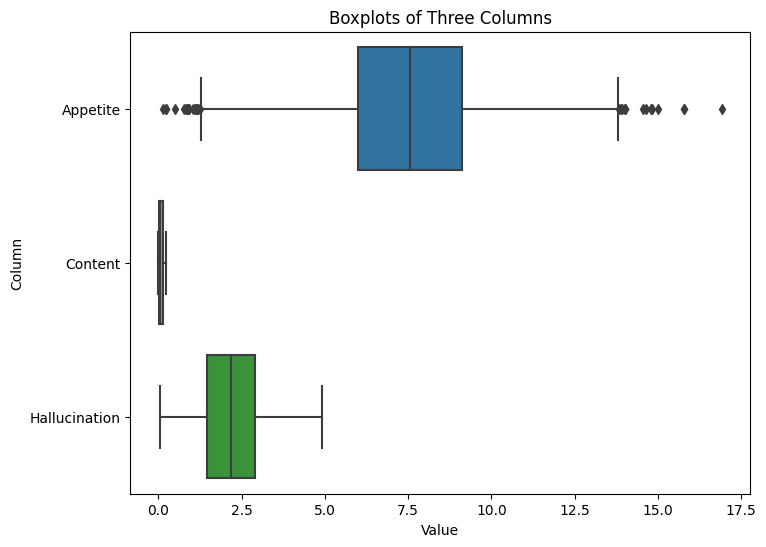

In [148]:
# Boxplot for the new transformed columns
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=final_df[['Appetite', 'Content', 'Hallucination']], orient='h', ax=ax)
ax.set_title('Boxplots of Three Columns')
ax.set_xlabel('Value')
ax.set_ylabel('Column')
plt.show()

#

#

Now that the data has been trasnformed and the missing values filled, I will look at variance of data prior to any ML models. It is important I investigate this as the variance of the data has a potential to impact the performance of ML models I will be using, including logistic regression. I will be removing any low variance features, as they don't provide any isnights for the model. I wil also be wary of very high variance, as they have to potential to mask other features and risk overfitting. However, if high variance is present, I will not be dropping the column to prevent losing information, instead, I will implement cross-validation during ML to select the best hyperparameters that reduce the variance of the model.

#

In [149]:
variances = final_df.var(ddof=0)
variances

Anhedonia           2.232558
Apathy              2.956505
Appetite            5.531441
Content             0.004915
Delusion            2.066677
Dep_Mood            1.814073
Focus               2.167789
Hallucination       0.949410
Participant         0.000000
Passive             1.157566
Psychomotor         2.209918
Rumination          4.629188
Sleep               1.980889
Tension             3.928813
Tired               2.182038
Unusual_Thought     1.969925
Withdrawal          2.165536
Race_Black          0.227425
Race_Hispanic       0.120400
Race_White          0.232244
Delay_Yes           0.249790
Housing_Unstable    0.060122
Female_N_Preg       0.249958
Female_Preg         0.054636
Male                0.247348
dtype: float64

In [150]:
# Drop low variance and 'Suspicious' columns that don't meet threshold of >0.7
final_df = drop_columns(final_df, ['Participant', 'Housing_Unstable', 'Female_N_Preg'])

# Reset the dataframes index
final_df.reset_index(drop= True, inplace= True)

#

#

---------------------------------------------------------------------------------------------------------------------------

#

--------------------------------------------------------- TRANSFORM X_TEST ---------------------------------------------------------

#

Now that X_train (final_df) set has been pre-processed, I will be transforming the X_test data with the same steps used on X_train. This will ensure no data leakage occurs and will create two sets of data that have been processed and transformed the same way to optimise the performance of ML model and make accurate prediction on unseen data.  

#

In [151]:
# Create dummy variables
X_test_dummy = create_dummy_variables(X_test)

# Create dummy variables for 'Pregnant' column
dummies = pd.get_dummies(X_test_dummy['Pregnant'], prefix='pregnant', dummy_na=True)

# Concatenate the dataframes and specify the order of columns
test_preg = pd.concat([X_test_dummy, dummies], axis=1)

# Rest index of dataframe
test_preg.reset_index(drop= True, inplace= True)

# Rename the columns 
test_rename = drop_and_rename_columns(test_preg, cols_to_drop, new_col)

# Replace -999 values with Nans
test_999 = replace_value_with_nan(test_rename, 'Passive', -999)

# Dropping highly correlated, anomalous and duplicated columns
cor_test = drop_columns(test_999, ['Stress', 'Intrusive_Thoughts', 'Concentration'])

# replace the infinite values with null values in 'Tired' column
inf_test = replace_value_with_nan(cor_test, 'Tired', [np.inf, -np.inf])

# Replace 0 with NaN in "Dep_Mood"
zero_test = replace_value_with_nan(inf_test, 'Dep_Mood', 0)

# Impute missing values from the training set data
zero_test[cols_to_fill] = fillna(final_df, cols_to_fill)

# Apply boxcox transformation,  from training set
#zero_test = boxcox_transform(final_df, ['Appetite', 'Content', 'Hallucination'])
zero_test[cols_to_transform] = final_df[cols_to_transform].apply(lambda x: boxcox(x + 1)[0])

#Drop low variance columns that don't meet threshold
drop_test = drop_columns(zero_test, ['Suspicious', 'Participant', 'Housing_Unstable', 'Female_N_Preg'])

#

#

In [152]:
# Print the shape of the X_train and X_test to see whether the processing steps were applied correctly
drop_test.shape, final_df.shape

((1000, 22), (4000, 22))

#

Now that the pre-processing is finished on the training set and matches the test set, including missing values, replacing -999, 0 and inf values into the nans, imputing these nans with the mean, and transforming the data with boxcox transformations. The data is ready to now proceed with ML models where I will be classifying data for the diagnosis of schizophrenia

#

#

#

#

# -------------------- MACHINE LEARNING --------------------

#

#

#

Reshape the X and y training dataframe into a NumPy array, to ensure that each sample is represented by a row and each feature is represented by a column.

In [153]:
X = np.array(final_df).reshape(len(final_df), len(final_df.columns))
y = np.array(y_train).reshape(len(y_train),)

X, y

(array([[ 7.51122153,  3.21464667,  6.86357631, ...,  1.        ,
          0.        ,  1.        ],
        [ 6.59101082, -0.04995684,  3.88030802, ...,  0.        ,
          0.        ,  0.        ],
        [ 5.42029059,  3.94932998,  8.75297086, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 6.34589683,  2.04045197,  6.27482109, ...,  0.        ,
          0.        ,  1.        ],
        [ 8.76240068,  3.29344092, 10.21042355, ...,  0.        ,
          0.        ,  0.        ],
        [ 5.60406921,  0.29153636,  8.91871814, ...,  0.        ,
          0.        ,  1.        ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

#

#

Prior to any ML models including logistic regression, I will scale the data so that all features are of equal importance. For my scaler I will use Min-max scaling to fit on the schizophrenia training set and transform both the training and test sets, to prevent data leakage into the training set. Min-max scaling ensures the data values are between 0 and 1, putting all the features on the same scale.

This has great importance as logistic regression uses gradient descent. Thus, scaling the features will reduce the disproportionate impact of outliers observed in the columns, making it more robust to anomalous data. Further, it will improve the rate of the algorithms convergence to the optimal solutions. Overall, it will improve the performance of the logistic regression ML model.


#

In [154]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_test =scaler.transform(drop_test)

c:\Users\wstefaniak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


#

#

#

# ---------------------- CLASSIFICATION ----------------------

--------------------------------------------------------- LOGISTIC REGRESSION ---------------------------------------------------------

#

For classification, I will use both Logistic Regression (LR) and Random Forest (RF) to identify the ML models accuracy of predictions. It will be interesting to see the difference in performance of these two models as one is robust to outliers and noise (RF), which may be present in this dataset. Whilst LR has the ability to identify non-linear relationships between the features and target variable (Diagnosis). The optimal model will then be tested with PCA trasnformed data to see if there are any improvement with the model. LR and RF are robust ML models for diagnosis data because they can provide interpretable results, handle non-linear relationships, are robust to noise, and are computationally efficient.

#

I chose LR due to its ability for classifying binary problems, to predict the diagnosis based on the set of features (for example whether the participants are experiencing hallucination), which vary from continuous numeric data (Content) or are binary (race). Further, it is computationally efficient and can handle large datasets with relatively low-dimensional feature spaces (Saishruthi Swaminathan, 2018).

I chose RF over decision trees as they can handle high-dimensional data better than Decision Trees. As RF can effectively reduce the dimensionality and prevent overfitting by randomly selecting a subset of features for each tree (Diego Lopez Yse, 2019). Further, they are less sensitive to noise in the data than Decision Trees. This is because each tree in the forest is trained on a randomly selected subset of the data, so noise is less likely to impact the overall model.


#

#

#

In [155]:
# Create logistic regression and random forest classification objects. 
log_reg = LogisticRegression(max_iter=10000, random_state=42) # random_state ensures consistency
rfc = RandomForestClassifier()

#

In order to optimise my models, I will perform nested K-fold cross-validation (Neale, 2019). This will identify the best combination of hyperparameters to yield the optimal model performance, by testing all combinations of hyperparameters on multiple subsets of data. Further, in combination with the grid search method, it will automate this process of hyperparameter tuning. 
Nested cross validation prevents data leakage through inner and outer loops, executed alognside grid search and cross validation score. This prevents using the same data to tune model parameters and evaluate its performance, preventing overfitting (Cawley and Talbot, 2010).


#

#

#

I will now perform nested K-fold cross-validation with random forest classification. I will be identifying the optimal five hyperparameters for the model: 

- n_estimators = number of trees in the forest. 
- max_depth = maximum depth of each tree in the forest. 
- min_samples_split = minimum number of samples required to split an internal node.
- min_samples_leaf = minimum number of samples required to be at a leaf node. . 
- max_features = number of features to consider when looking for the best split.

Whilst increasing the parameters can improve the performance of the RF model, it can lead to overfitting and risk the trade-off between performance and computational efficiency. Further, to ensure the computational efficiency, I will only be using n_estimators and max_depth paraemters.

#

#

In [156]:
# Define the number of folds for the outer loop 
k_outer = 10 # outer loop is responsible for splitting the data into training and testing sets

# Create a KFold object for the outer loop
kf_outer = KFold(n_splits=k_outer, shuffle=True, random_state=42)

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15]}

# Initialize an empty list to store the accuracy scores
scores = []

# Perform nested cross-validation
for train_index_outer, test_index_outer in kf_outer.split(X):
    # Split the data into outer training and test sets
    X_train_outer, X_test_outer = X[train_index_outer], X[test_index_outer]
    y_train_outer, y_test_outer = y[train_index_outer], y[test_index_outer]
    
    # Create a KFold object for the inner loop
    kf_inner = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Create a random forest object
    rf = RandomForestClassifier(random_state=42)
    
    # Create a GridSearchCV object
    grid_search = GridSearchCV(rf, param_grid=param_grid, cv=kf_inner, scoring='accuracy')
    
    # Fit the GridSearchCV object on the training set
    grid_search.fit(X_train_outer, y_train_outer)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    
    # Train the random forest model with the best hyperparameters on the outer training set
    rf_best = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
    rf_best.fit(X_train_outer, y_train_outer)
    
    # Make predictions on the outer test set
    y_pred_rf = rf_best.predict(X_test_outer)
    
    # Calculate the accuracy score
    accuracy_outer = accuracy_score(y_test_outer, y_pred_rf)
    
    # Append the accuracy score to the list of scores
    scores.append(accuracy_outer)

# Compute the mean accuracy score across all folds
mean_accuracy_rf = np.mean(scores) # will be used in evaluation metrics



KeyboardInterrupt: 

In [ ]:
# Print RF accuracy score
print("Random Forest Accuracy Score : ", mean_accuracy_rf)

Random Forest Accuracy Score :  0.9385


#

In [189]:
# Define the number of folds
k = 10

# Create a KFold object
kf = KFold(n_splits=k)

# Initialize an empty list to store the accuracy scores
scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model on the training set
    log_reg.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = log_reg.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list of scores
    scores.append(accuracy)
    
# Compute the mean accuracy score across all folds
mean_accuracy = np.mean(scores)

# Print the mean accuracy score
print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.9272499999999999


[[5.42692450e-01 4.57307550e-01]
 [9.52373779e-02 9.04762622e-01]
 [9.94899859e-01 5.10014111e-03]
 [7.39206370e-03 9.92607936e-01]
 [9.77984590e-01 2.20154095e-02]
 [9.99802181e-01 1.97819433e-04]
 [1.12021234e-05 9.99988798e-01]
 [8.04150647e-02 9.19584935e-01]
 [4.86532194e-03 9.95134678e-01]
 [6.68256656e-01 3.31743344e-01]]


Text(0.5, 1.0, 'Histogram of predicted probabilities of Diagnosis')

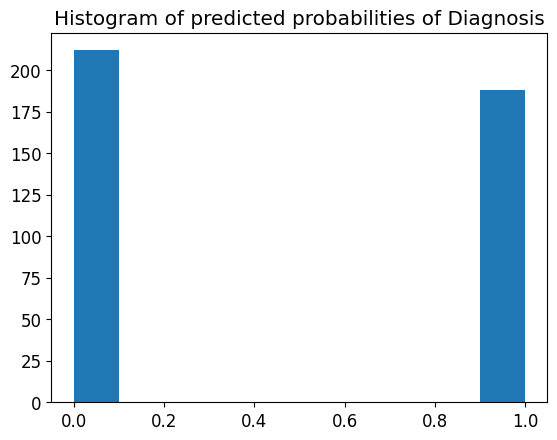

In [195]:
# print the first 10 predicted probabilities of classes 0 and 1

print(log_reg.predict_proba(X_test)[0:10])

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Diagnosis')

Both the logistic regression and random forest gave high accuracy scores, proving efficient models which I will further evaluate using evaluation metrics. However, even though RF model has a high accuracy score of 0.93, it is very similar to 0.927 from logisitc regression and due to the lack of computation efficiency from RF on my computer, I will only be going forward with logistic regression model.

#

#

#

---------------------------------------------------------- Evaluate Performance ----------------------------------------------------------

#

#

To assess  the performance of ML model, I will be utilising evaluation metrics to assess the models ability to correctly conduct classification. I will use:



- Classification report, which includes the follwing metrics (Zuccarelli, 2021):

    - Precision: proportion of true positive predictions (correctly classified positive instances) out of all positive predictions made.

    - Recall (sensitivity): the number of true positives divided by the sum of true positives and false negatives. It measures the proportion of actual positives that are correctly identified as positives by the model.

    - F1-score: the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when classes are imbalanced.

    - Support: the number of occurrences of each class in the target variable.


- Accuracy score = proportion of correct predictions out of the total number of predictions made. 

- AUC-ROC (Receiver Operating Characteristic (ROC) Curves)= plots the true positive rate (fraction of correctly predicted positive instances), against the false positive rate for different threshold values.

- Confusion matrix = summarises the ML models performance (including error produced), divided into 4 outcomes=
    - True Positives (TP) – when an observation belongs to a certain class and the observation actually belongs to that class.
    - True Negatives (TN) –  when the predicted observation does not belong to a certain class and the observation actually does not belong to that class.
    - False Positives (FP) – when the predicted observation belongs to a certain class but the observation actually does not belong to that class=  Type I error.
    - False Negatives (FN) – when the predicted observation does not belong to a certain class but the observation actually belongs to that class= Type II error.

These metrics will allow me to chose the best algorithm and fine-tune its parameters for optimal performance.

#

#

In [160]:
# Print log_reg accuracy score
print("Logistic Regression Accuracy Score : ", mean_accuracy)


Logistic Regression Accuracy Score :  0.9272499999999999


#

The accuracy score of 0.92 is very high, indicating that the model correctly predicted the outcome of 92% of the cases in the schizophrenia dataset by logistic regression. However, accuracy is just one metric. Thus to further evaluate the models performance I will be now looking at other evaluation metrics, such as precision, recall, F1-score through theclassification report.

#

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       208
           1       0.95      0.93      0.94       192

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400


True Positives(TP) =  198

True Negatives(TN) =  178

False Positives(FP) =  10

False Negatives(FN) =  14


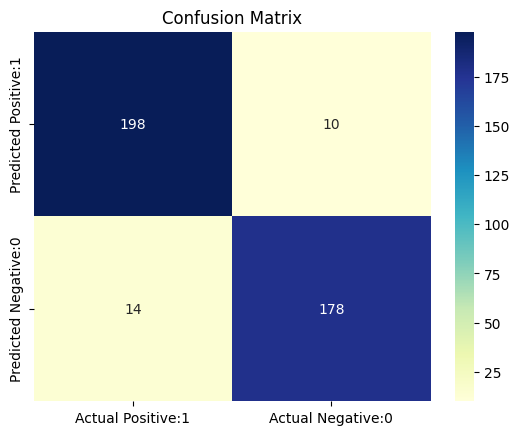

In [161]:
# Print the classification report 
print(classification_report(y_test, y_pred))

# Define the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the Confusion Matrix and slice it into four pieces

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predicted Positive:1', 'Predicted Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')

plt.show()

#

The confusion matrix above shows the great performance of the model in classifying the diagnosis of schizophrenia, as there are proportionally greater TN (178) and TP (198) in comparison to FN (14) and FP (10).  However, whilst the FN and FP are minimally disproportionate compared to the true values, the false negatives  were more present than false positives. This is further shown by the recall score outputs (in classification report) of 0.92 for negative data, whilst drops to 0.88. Considering the context of this data being medical data for diagnosis, a false negative causes more harm than a false negative result. Thus this is something that the model needs improvement on.

An F1 score in the classification report of 0.90 means that the model's accuracy and precision are both high, as reflected by the precision score of 0.87 means that out of all the positive predictions made by the model, 87% of them were correct. However, I will now plot the ROC curve to graph the rate of true positive against false positives, to show to performance of the binary classifier.

#

#

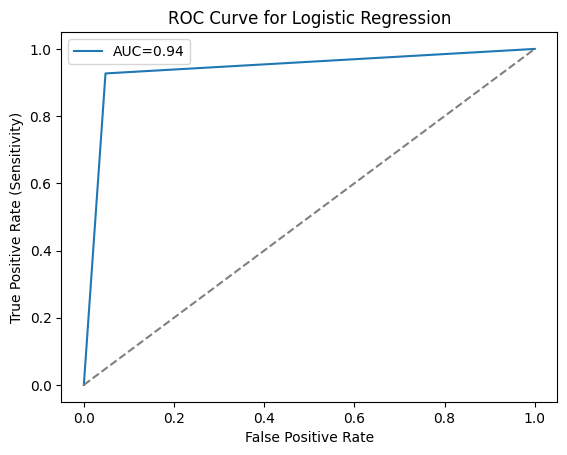

In [162]:
# y_true: true labels, y_scores: predicted scores/probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()


#

The identified AUC (Area Under the Curve) score of 0.94 indicates that the LR classifier has good ability in distinguishing between positive and negative instances. Therefore, the classifier has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

#

#

#

Overall, considering all the evaluation metrics discussed, logistic regression classification model performed incredibly well, with high evaluation metric values. This suggests that all the preprocessing including feature selection and engineering methods were ideal for such model. However, in case it could be further optimised and I missed some key redundant features, I will perform PCA and observe how PCA transformed data affects logistic regression.

#

#

#

#

--------------------------------------------------------- Principal Component Analysis -----------------------------------------------------------

#

I have decided to conduct Principal Component Analysis (PCA) after the classification models to identify whether reducing dimensionality within the dataset, whilst retaining the optimal variability, improves my classification ML models (Brems, 2017). I am hoping that the analysis will reduce the noise and redundancy in the data, alongside improving computational efficiency,  consequently reducing any overfitting that had occured to create the optimal model.

Ideally, PCA will reduce any remaining multicollinearity and identify the key features to transform into smaller, uncorrelated components, further improving the interpretability and generalization performance of the ML models.  I did so as already existing multicollinearity can affect the performance of PCA, creating PCs that are less representative of the original schizophrenia dataset, risking interpretation issues. Thus, by removing the visually correlated features identified in the correlation matrix, the remaining variables are an acurate representation describing the structure of underlying data. Further, the removal of the highly correlated variables was manual via a correlation matrix, which is not as effective as using a robust automates technique of PCA. Moreover, during feature selection, I dropped low variance features as they hold limited valuable information, thus would lead to noise within the analysis and less efficient computation.

#

#

In [163]:
"""
The cumulative explained variance ratio evaluates the volume of information retained by each principal component.
"""

# Initialize PCA
pca = PCA()

# Fit the PCA model to the standardized data
X_tranformed = pca.fit_transform(X_scaled)

# Compute the cumulative explained variance ratio
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Prints the explained variance ratio for each PC
for i, j in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {round(pca.explained_variance_ratio_[i]*100, 2)} %")

PC1: 24.5 %
PC2: 17.35 %
PC3: 14.58 %
PC4: 11.64 %
PC5: 6.21 %
PC6: 3.77 %
PC7: 3.27 %
PC8: 2.52 %
PC9: 2.39 %
PC10: 1.72 %
PC11: 1.38 %
PC12: 1.36 %
PC13: 1.3 %
PC14: 1.23 %
PC15: 1.18 %
PC16: 1.15 %
PC17: 1.11 %
PC18: 1.07 %
PC19: 0.98 %
PC20: 0.79 %
PC21: 0.26 %
PC22: 0.24 %


#

As identified through computing the cumulative explained variance ratio:

                        *16 PCs make up for 95% of all features variance (95.55%)*
 
I will retain the PCs that make up 95% of variance (mikulskibartosz, 2019). I will further visualise the explained variance ratio via a scree plot, which shows the proportion of variance explained by each principal component. This will help me understand the variation that each PC accumulates, which will help me confirm that the number of PCs to retain is 16. 

#

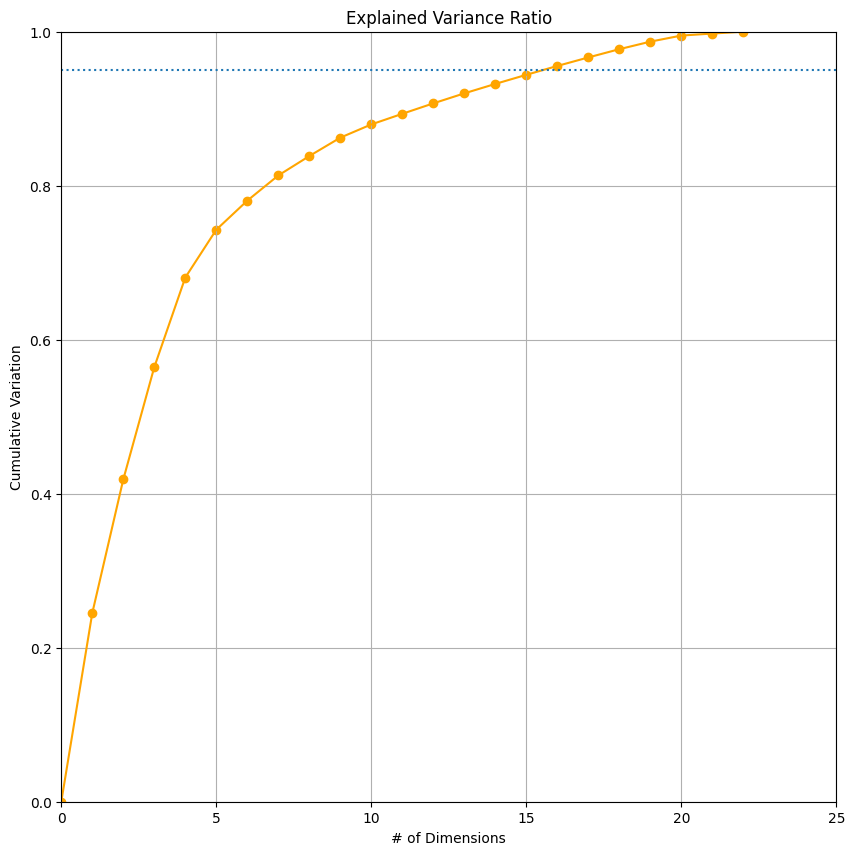

In [164]:
# Identify the EVR
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum = np.insert(cumsum, 0, 0) # add a 0 at the beginning of array, so the first value on the y-axis is 0.

# Plot the scatter graph
plt.figure(figsize=(10, 10))
plt.plot(range(0,len(cumsum)), cumsum, c='orange')
plt.scatter(range(0, len(cumsum)), cumsum, c='orange')
plt.grid()

# Add labels
plt.xlabel('# of Dimensions') # x-axis shows the number of principal components
plt.ylabel('Cumulative Variation') # y-axis shows the proportion of variance explained by each component
plt.xlim(0, 25)
plt.ylim(0, 1)
plt.title('Explained Variance Ratio')
plt.axhline(0.95, linestyle='dotted') # dotted line at the 95% variance


#

The points after the elbow point on the scree plot, where the additional PCs do not provide additional variance and thus information, shows the optimal number of components to retain (i.e. 16).

#

In [168]:
# Perform PCA to reduce the dimensionality to 16
pca = PCA(n_components=16)
train_pca = pca.fit_transform(X_scaled)

# Convert to dataframe to show the PCs
component_names = [f"PC{i+1}" for i in range(train_pca.shape[1])]
X_pca = pd.DataFrame(train_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.343700,1.011968,0.193696,-0.118437,-0.186634,-0.099742,0.017741,-0.016363,0.046431,-0.141704,-0.072168,-0.251297,0.157704,-0.175407,-0.080342,0.037195
1,-0.990769,-0.374800,-0.054484,-0.265294,0.320696,-0.224153,-0.092404,-0.096344,-0.157240,0.012816,-0.024172,-0.142872,-0.147995,-0.211608,-0.099112,0.096787
2,-0.070226,0.214624,-0.762407,0.195463,0.097571,-0.268578,0.024394,0.434903,0.099878,-0.326015,0.076782,0.070917,-0.074422,0.097227,-0.118760,-0.077809
3,-0.485763,0.208391,0.737364,-0.203772,-0.477966,0.341812,-0.116972,0.006731,0.246074,-0.035479,-0.087762,-0.060489,-0.076598,0.130889,-0.131375,-0.128040
4,1.028225,0.480901,0.013126,-0.194926,-0.256913,0.198149,0.006272,-0.014344,0.192205,-0.053482,0.082154,-0.038234,-0.090881,-0.039579,-0.058345,-0.082167


#

#

Now that I have the PCA-transformed data, with new, orthogonal components that explain the datas variance, I will use the transformed data to evaluate the models performance on the new feature space with new, unseen data. I will create a pipeline (Santos, 2022), to create the process of scaling, doing PCA and LR less time consuming and less prone to error. 

#

In [201]:
# Create a Pipeline
steps = [('scaler', MinMaxScaler()), # Scale the data
         ('pca', PCA(n_components=.95)), # components for 95% of feature variance
         ('clf', LogisticRegression())] # classifier
pipe_lr = Pipeline(steps)

# Fit the pipeline 
pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

# Print training set
print("TRAIN:")
print(classification_report(y_train, train_predictions))

# Print test set
print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1793
           1       0.92      0.91      0.92      1807

    accuracy                           0.92      3600
   macro avg       0.92      0.92      0.92      3600
weighted avg       0.92      0.92      0.92      3600

TEST:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       208
           1       0.92      0.91      0.91       192

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



#

Whilst the pipeline made the process seamless, there are no drastic differences between the model before or after PCA. This suggests that feature selection during my pre-processing was sufficient to reduce dimensionality within the dataset. This would also open up an opportunity to try a different dimensionality reduction, for example DBSCAN.

#

#

#

#

#

# Conclusion

#

In conclusion, I have effectively performed a classification task for schizophrenia diagnosis alongisde dimensionality reduction, reducing the optimal n components to 16, even though this didn't make much difference on the logistic regression model. However, the clustering (in appendix) did not work as expected, with the silhouette score of 0.117237263,this could be due to high noise in the data, as observed in the pre-processing data steps, there was a high volume of outliers which skewed the data. Therefore, future models used should be more robust to outliers, for example XGBoost (Martins, 2021). ANother thing to consider is during pre-processing, I removed a high volume of '0' values in 'dep_mood' and turned them into Nan. These could've been legitamate data ppints indicating no depressive mood which would've provided more information for the ML model, however, I decided to impute these with the mean, which could've altered the performance of the model.

It is important to be wary of the identified false negatives from the ML model more than false positives in the dataset, as this is medical data on schizophrenia making it the outcomes sensitive. Therefore, whilst the models show great insights into diagnosis, it shouldn't be used solely for diagnosis. 

Further an aspect in the data which may not be as clear is how columns including 'race' and 'sex' affect the bias of the model, possibly degrading the models performace. Reinstating that the data is on sensitive information consisting of health aspect of vulnerable individuals. The bias that arises from such columns may be difficult to eradicate, as simply removing 'race' or 'sex' columns may not be sufficient to eliminate bias, as other viarables which hold valuable information, may still be correlated with the columns and indirectly contribute to the bias. Therefore, extra precautions need to be taken when dealing with such sensitive data, such as implementing debias techniques and feature engineering.

#

In the future to further optimise machine learning to classify the diagnosis of schizophrenia, I could utilise the following methods:
- Expand the pipeline (Santos, 2022)

Whilst I used a pipeline to integrate scaling, PCA and logistic regression on PCA transformed data. It would be more efficient to streamline data preprocessing steps alongside the ML and hyperparameter tuning, ensuring all the steps are equal and applied to the training and test sets. This will not only improve reproducibility, but also make the process less time consuming and reducing human prone errors. It can also be integrated with ML model and hyperparameter tuning to ensure all the same steps are applied to the training and test set, improving reproducability.

- Incorporating SHAP values (Trevisan, 2022)

These will measure the importance of the features and their contributions for machine learning models, potentially more efficiently than PCA. These values can also be used to interpet random forests ML models to justify certain behaviours shown by the models and identify potential biases.





- Trying different ML models, including XGBoost (Martins, 2021)

The performance of XGBoost often outperforms other ML models algorithms, in accuracy and efficiency due to its ability to handle missing values and identify feature importances. Considering the schizophrenia dataset consisted of many columns with erroneous or missing values, which had to be dropped, or filled with a not an optimal method of mean, this could've been prevented and more features with valuable information could've been utilised to improve the models. Further, due to XGBoost feature importance scores, the whole process of PCA could've been skipped, increasing computational efficiency.

- Utilise Boosting, stacking, and bagging ensemble methods (Rocca, 2019)

Combining the predictions of multiple models, can make the model more robust to noise to reduce the impact of outliers on ML models predictions Also, they help reduce bias and variance, which can result in better performance in ML models, whilst simultaneously preventing overfitting trhough training on different subset of data


#

# References

#

Brems, M. (2017). A One-Stop Shop for Principal Component Analysis. [online] Medium. Available at: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c.


Cawley, G. and Talbot, N. (2010). On Over-fitting in Model Selection and Subsequent Selection Bias in Performance Evaluation. Journal of Machine Learning Research, [online] 11, pp.2079–2107. Available at: https://jmlr.csail.mit.edu/papers/volume11/cawley10a/cawley10a.pdf.

DeJesus, J. (2021). Your MNAR Data Technique Guide. [online] Medium. Available at: https://towardsdatascience.com/your-mnar-data-technique-guide-9b7e85ad67 [Accessed 28 Mar. 2023].

Diego Lopez Yse (2019). The Complete Guide to Decision Trees. [online] Medium. Available at: https://towardsdatascience.com/the-complete-guide-to-decision-trees-28a4e3c7be14.

Lodder, P. (2013). To Impute or not Impute: That’s the Question Paper Methodological Advice. [online] Available at: https://www.paultwin.com/wp-content/uploads/Lodder_1140873_Paper_Imputation.pdf.

Martins, D. (2021). XGBoost: A Complete Guide to Fine-Tune and Optimize your Model. [online] Medium. Available at: https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663.

mikulskibartosz (2019). PCA — how to choose the number of components? [online] Bartosz Mikulski. Available at: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/#:~:text=Typically%2C%20we%20want%20the%20explained%20variance%20to%20be [Accessed 28 Mar. 2023].

Nantasenamat, C. (2021). How to Tune Hyperparameters of Machine Learning Models. [online] Medium. Available at: https://towardsdatascience.com/how-to-tune-hyperparameters-of-machine-learning-models-a82589d48fc8.

Neale, C. (2019). Cross Validation: A Beginner’s Guide. [online] Medium. Available at: https://towardsdatascience.com/cross-validation-a-beginners-guide-5b8ca04962cd.

Rocca, J. (2019). Ensemble methods: bagging, boosting and stacking. [online] Medium. Available at: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205.

Trevisan, V. (2022). Using SHAP Values to Explain How Your Machine Learning Model Works. [online] Medium. Available at: https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137.

Zuccarelli, E. (2021). Performance Metrics in Machine Learning — Part 1: Classification. [online] Medium. Available at: https://towardsdatascience.com/performance-metrics-in-machine-learning-part-1-classification-6c6b8d8a8c92.

#

Appendix

In [ ]:

# Create empty list for silhouette scores
sil_scores = []

# Try different numbers of clusters
for n_clusters in range(2, 20):
    
    # Create KMeans model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(X_scaled)
    
    # Get the cluster labels
    labels = kmeans.labels_
    
    # Get the silhouette score
    sil_score = silhouette_score(X_scaled, labels)
    
    # Append the silhouette score to the list
    sil_scores.append(sil_score)
    
# Plot the results
plt.plot(range(2, 20), sil_scores)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


silhouette score of 0.117237263 suggests that the clustering may not be very good, as the data points are relatively close to the decision boundary between two clusters. A score of 0 indicates that the data point is close to the decision boundary between two clusters

In [202]:
# `X` is your feature matrix

# Determine the optimal number of clusters using the silhouette score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

# Find the number of clusters with the highest silhouette score
best_k = sil_scores.index(max(sil_scores)) + 2

# Fit the K-Means clustering model using the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)

# Get the predicted cluster labels for each sample
labels = kmeans.predict(X)

# Get the coordinates of the cluster centers/centroids
centroids = kmeans.cluster_centers_

# Print the Silhouette Score
print("Silhouette Score:", silhouette_score(X, labels))


# Plot the clusters and the centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()


c:\Users\wstefaniak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\wstefaniak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
inertia = []

for i in range(2, 10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X_scaled)
    inertia.append(k_means.inertia_)